# Generation of data sets for predicting the efficacy of G9a inhibitors 

### Content   <a name="content"></a>

1. [Load and analyse PubChem BioAssay G9a inhibitor data](#1)
2. [Create a data frame with G9a inhibitors](#2)
3. [Adding properties of the compounds computed by PubChen and Cactvis](#3)
4. [Adding variables based on the substance 2D coordinates ](#4)
5. [Adding hypothetical volumes of the compounds based on their 2D coordinates of the substances](#5)
6. [Adding variables based on the compounds 3D coordinates](#6)
7. [Adding hypothetical volumes based on the compounds 3D coordinates](#7)
8. [Adding the relative proportion of the atoms of the compounds](#8)
9. [Adding the mass proportion of the atoms of the compounds](#9)
10. [Adding the relative sizes of molecules](#10)
11. [Adding similarity between the compounds based on their SMILES](#11)
12. [Creating of the based csv file](#12)
13. [Load the solubility dataset and create reduced a csv file, containing solubility data](#13)
14. [Create new compounds feature and a csv file containign them](#14)
15. [Remove skewness from data and create a scv file with this data](#15)

In [1]:
# pip install pandas  # pip install --upgrade pandas
# pip install missingno
# pip install rdkit
# pip install chemformula
# pip install tables
# pip install imbalanced-learn

### Load and analyse PubChem BioAssay G9a inhibitor data <a name="1"></a>

In [2]:
import pandas as pd 

# load the BioAssay PubChem AID 504332 dataset
df_targets = pd.read_csv('pubchem_G9a.csv')

# To avoid truncation of some columns during data frame display
pd.set_option('display.max_columns', None) 

# Display the data frame
print('Shape of the data frame: ', df_targets.shape)
df_targets.head()

Shape of the data frame:  (353737, 44)


,PUBCHEM_RESULT_TAG,SID,CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype,Potency,Efficacy,Analysis Comment,Curve_Description,Fit_LogAC50,Fit_HillSlope,Fit_R2,Fit_InfiniteActivity,Fit_ZeroActivity,Fit_CurveClass,Excluded_Points,Max_Response,Activity at 0.00366 uM,Activity at 0.00865 uM,Activity at 0.018 uM,Activity at 0.041 uM,Activity at 0.092 uM,Activity at 0.133 uM,Activity at 0.202 uM,Activity at 0.415 uM,Activity at 0.501 uM,Activity at 0.843 uM,Activity at 1.264 uM,Activity at 2.335 uM,Activity at 3.417 uM,Activity at 5.146 uM,Activity at 10.61 uM,Activity at 12.70 uM,Activity at 21.52 uM,Activity at 31.98 uM,Activity at 58.95 uM,Activity at 101.6 uM,Activity at 134.7 uM,Activity at 186.0 uM,Compound QC
0,154378,57257240,135953404.0,C#CCOCCOCCOCCNC1=NC(=NC(=N1)N2CCN(CC2)C(=O)CN3...,Inactive,0,NaN,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8175,NaN,NaN,4.0834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by Kevin Burgess - Texas A and M Univ. - ...
1,154349,57257238,135953403.0,CC(C)(C)C1=CC(=C(C(=C1)C(C)(C)C)O)C2=NC(=NC(=N...,Inactive,0,NaN,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,-9.2676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.1391,NaN,NaN,-9.2676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by Elizabeth A Amin - Univ. of Minnesota ...
2,180795,57255498,135953402.0,CC[C@H](C)[C@@H](C(=O)N1CCN(CC1)C2=NC(=NC(=N2)...,Inactive,0,NaN,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,-2.6485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.5227,NaN,NaN,-2.6485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by Kevin Burgess - Texas A and M Univ. - ...
3,180827,57255496,135953401.0,CC[C@H](C)[C@@H](C(=O)N1CCN(CC1)C2=NC(=NC(=N2)...,Inactive,0,NaN,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,8.8802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0368,NaN,NaN,8.8802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by Kevin Burgess - Texas A and M Univ. - ...
4,180868,57255491,135953400.0,CCCCC1=CN(N=N1)[C@@H](CCCC[NH3+])C(=O)N2CCN(CC...,Inactive,0,NaN,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,-2.1811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5293,NaN,NaN,-2.1811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by Kevin Burgess - Texas A and M Univ. - ...


In [3]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353737 entries, 0 to 353736
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PUBCHEM_RESULT_TAG             353737 non-null  int64  
 1   SID                            353737 non-null  int64  
 2   CID                            353732 non-null  float64
 3   PUBCHEM_EXT_DATASOURCE_SMILES  353732 non-null  object 
 4   PUBCHEM_ACTIVITY_OUTCOME       353737 non-null  object 
 5   PUBCHEM_ACTIVITY_SCORE         353737 non-null  int64  
 6   PUBCHEM_ACTIVITY_URL           0 non-null       float64
 7   PUBCHEM_ASSAYDATA_COMMENT      0 non-null       float64
 8   Phenotype                      353737 non-null  object 
 9   Potency                        91291 non-null   float64
 10  Efficacy                       91291 non-null   float64
 11  Analysis Comment               0 non-null       float64
 12  Curve_Description             

In [4]:
# Remove duplicates 
df_targets.drop_duplicates()
df_targets.shape  # 353737 means no duplicates

(353737, 44)

In [5]:
# Remove the isomers without keeping any of the forms 
df_targets = df_targets.drop_duplicates(subset=['CID'], keep=False)
df_targets.shape

(343698, 44)

In [6]:
# Remove compounds with missing CID-s
df_targets = df_targets[df_targets['CID'].notna()]
df_targets.shape

(343698, 44)

In [7]:
# Turn CID float data type into integer
df_targets['CID'] = df_targets['CID'].astype(int) 

<Axes: >

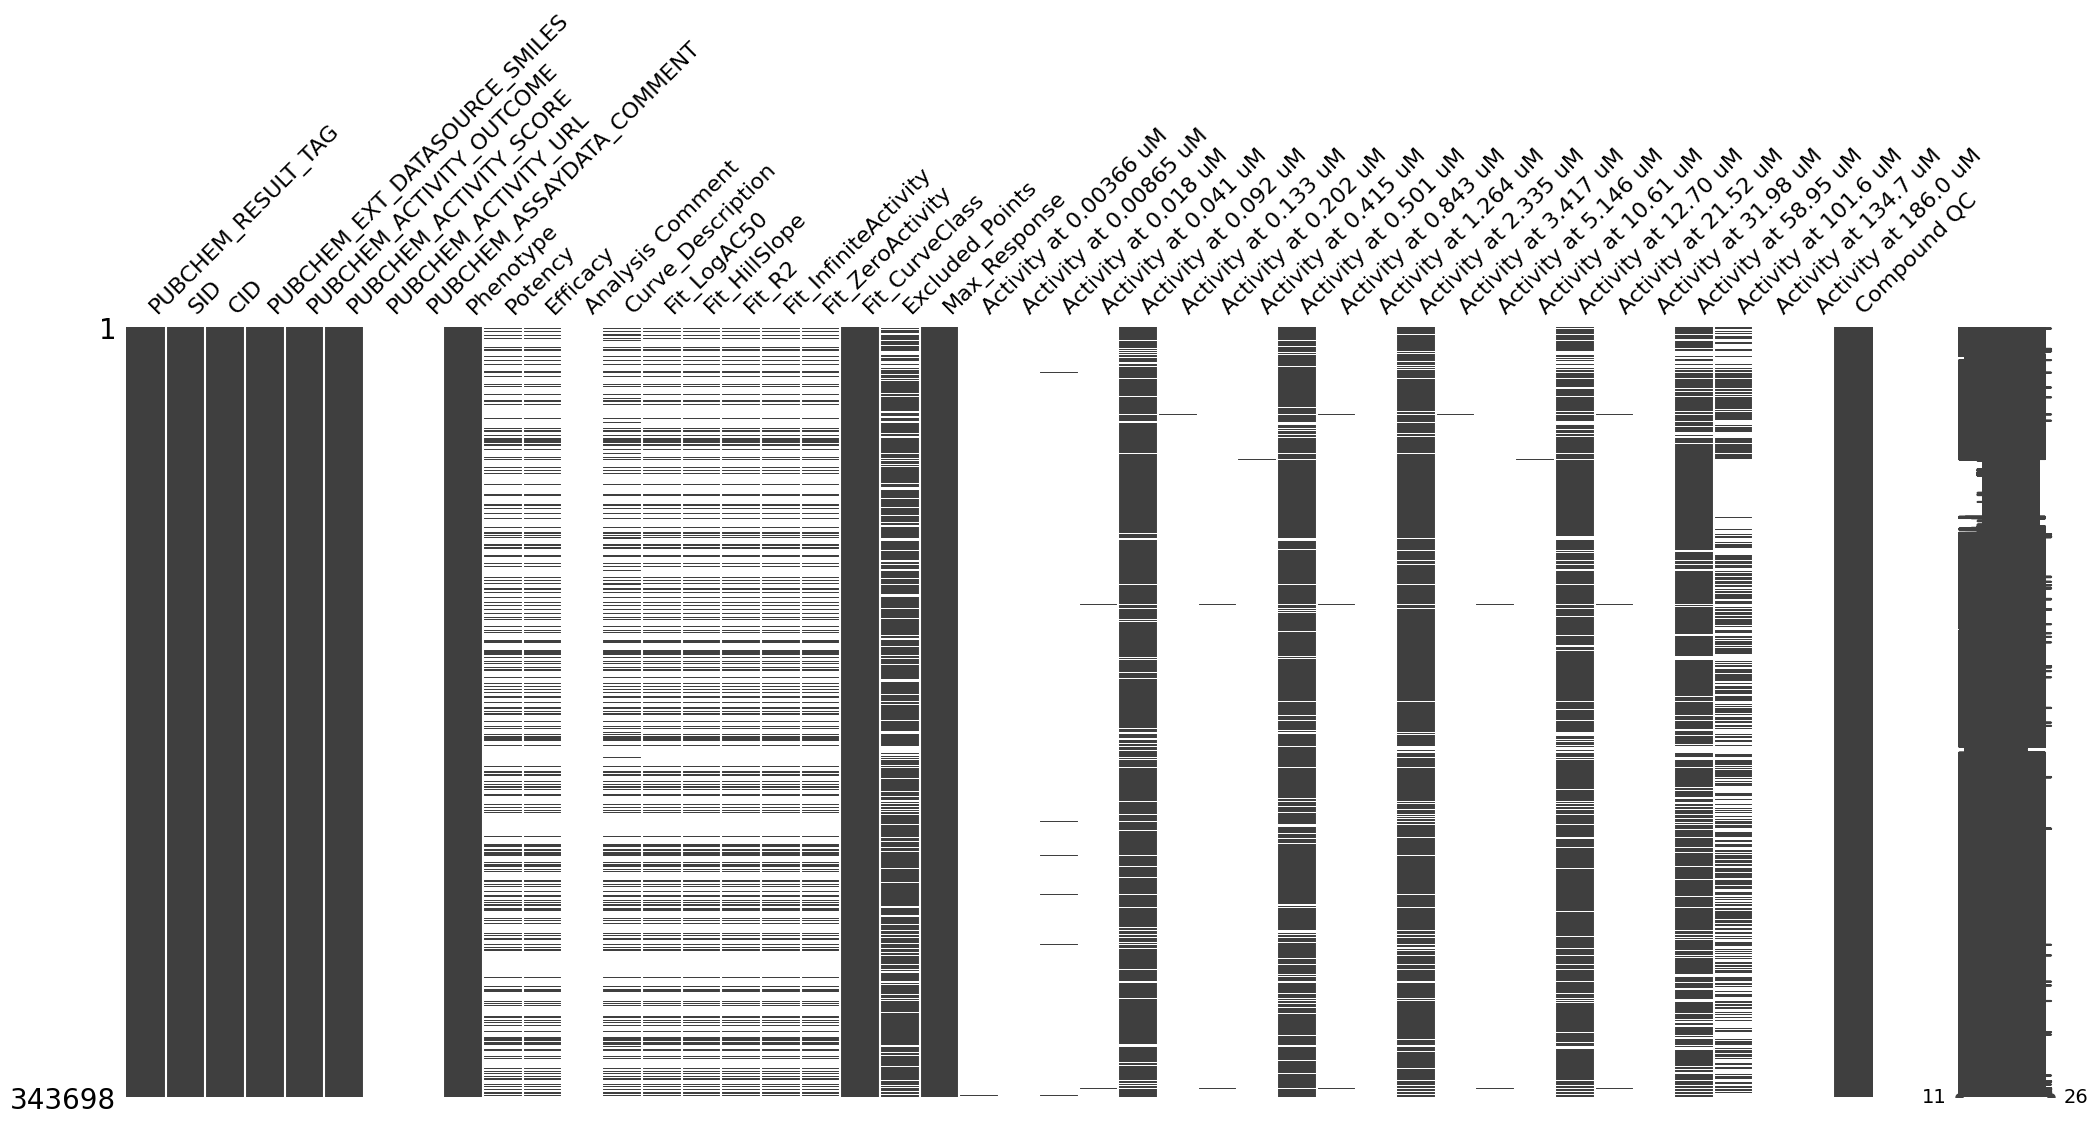

In [8]:
# Explore the data set visualising the missing values
import missingno as msno 
%matplotlib inline
msno.matrix(df_targets)

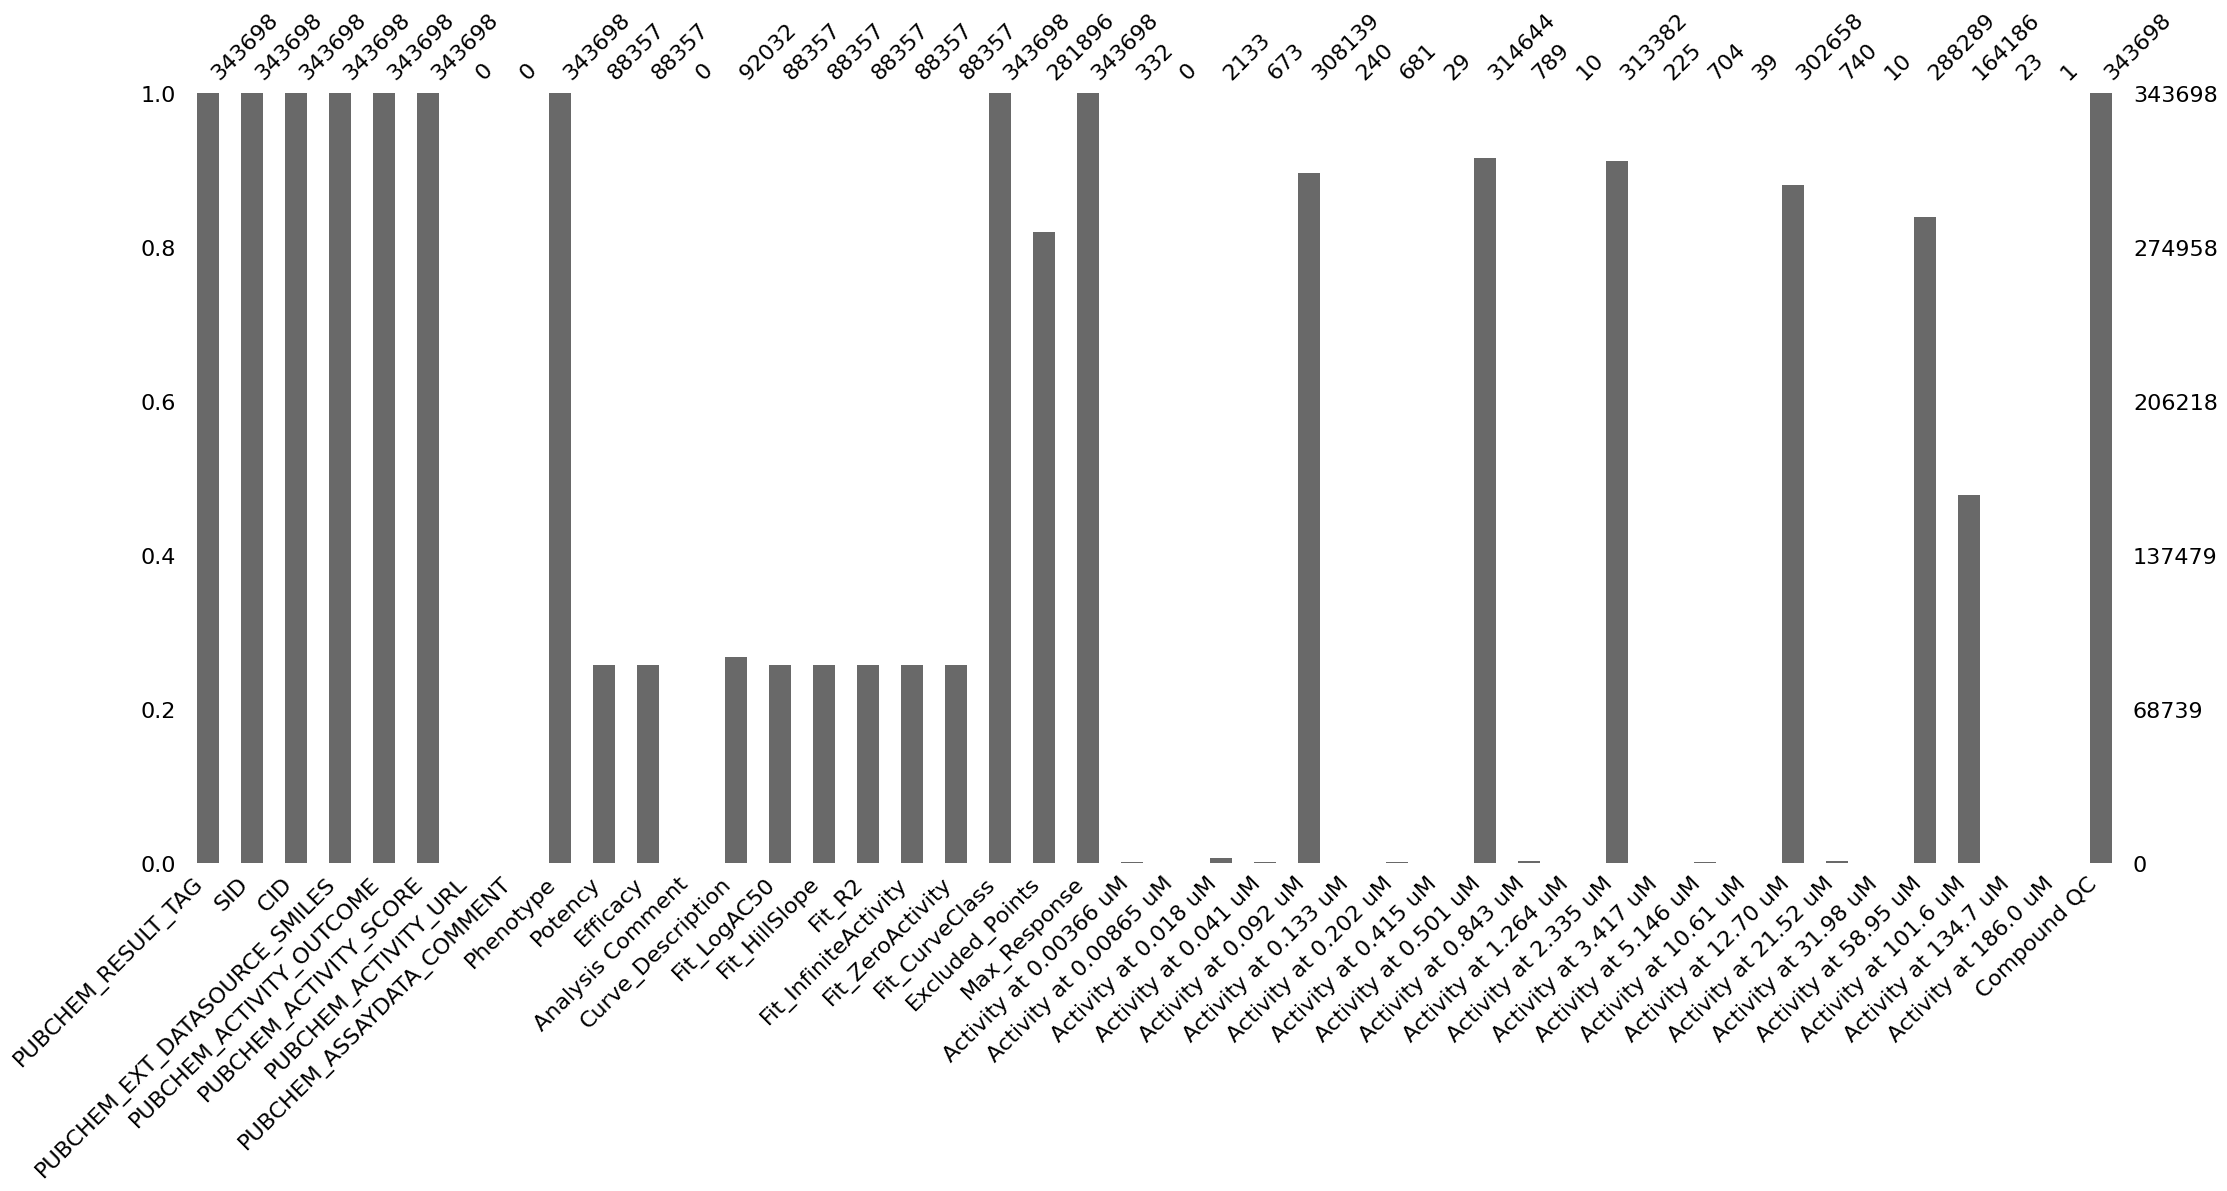

In [9]:
msno.bar(df_targets);

In [10]:
import numpy as np

# Count missing values 
def _impute_missing_data(data):
    return data.replace(-1, np.nan)

df_targets = _impute_missing_data(df_targets)
print('NaN values =', df_targets.isnull().sum().sum())
print("""""")
vars_with_missing = []
for feature in df_targets.columns:
    missings = df_targets[feature].isna().sum()
    
    if missings > 0 :
        vars_with_missing.append(feature)
        missings_perc = missings / df_targets.shape[0]
        print('Variable {} has {} records ({:.2%}) with missing values.'.format(feature, missings, missings_perc))
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

NaN values = 8995429

Variable PUBCHEM_ACTIVITY_URL has 343698 records (100.00%) with missing values.
Variable PUBCHEM_ASSAYDATA_COMMENT has 343698 records (100.00%) with missing values.
Variable Potency has 255341 records (74.29%) with missing values.
Variable Efficacy has 255341 records (74.29%) with missing values.
Variable Analysis Comment has 343698 records (100.00%) with missing values.
Variable Curve_Description has 251666 records (73.22%) with missing values.
Variable Fit_LogAC50 has 255341 records (74.29%) with missing values.
Variable Fit_HillSlope has 255341 records (74.29%) with missing values.
Variable Fit_R2 has 255341 records (74.29%) with missing values.
Variable Fit_InfiniteActivity has 255342 records (74.29%) with missing values.
Variable Fit_ZeroActivity has 255386 records (74.31%) with missing values.
Variable Excluded_Points has 61802 records (17.98%) with missing values.
Variable Max_Response has 1 records (0.00%) with missing values.
Variable Activity at 0.00366 

[<a href="#content">Back to top</a>]

## Create a data frame with G9a inhibitors <a name="2"></a>

In [11]:
# Filter inhibitors 
df_targets = df_targets[(df_targets['Phenotype'] == 'Inhibitor')] 

In [12]:
# Create a data frame containing the regression targets
df_targets = df_targets [['CID', 'SID', 'Efficacy', 'PUBCHEM_EXT_DATASOURCE_SMILES']]

# Rename the 'PUBCHEM_EXT_DATASOURCE_SMILES' column
df_targets = df_targets.rename(columns={'PUBCHEM_EXT_DATASOURCE_SMILES': "SMILES"})

# Drop NAN in column Efficacy
df_targets = df_targets.dropna(subset=['Efficacy'])

# Display the data frame
print('Shape of df_targets : ', df_targets .shape)
df_targets .head()

Shape of df_targets :  (77536, 4)


,CID,SID,Efficacy,SMILES
19,135915053,56319965,163.3340,CCCN1C(=CC(=C1C)C2=CSC(=N2)NC(=O)CCC3=NC4=CC=C...
20,135915052,56318992,109.5210,CCCC1=CC(=O)NC(=N1)SCC(=O)N(CCOC)C2=C(N(C(=O)N...
23,135915049,56318405,102.7680,CC1=C(C=C(C=C1)NC(=O)CCC2=NC3=CC=CC=C3C(=O)N2)...
31,135903069,57264440,165.3870,CC1=C(C=CC(=C1)C2=CC(=C(C=C2)N=NC3=C(C4=C(C=C(...
43,135900543,51086642,98.1573,C1=CC(=CC=C1NC(=O)CSC2=NC(=C(C(=O)N2)NC(=O)C3=...


In [13]:
# Create a csv file with compounds that do not have duplicates
df_targets.to_csv('data_for_one_column_CID_SID.csv')

[<a href="#content">Back to top</a>]

## Adding properties of the compounds computed by PubChen and Cactvis<a name="3"></a>

A single-column csv list of CIDs and SIDs was created and
compound properties calculated by PubChem were downloaded, as follows:
- CID - Compound ID
- MW - Molecular Weight [g/mol]
- MF - Molecular Formula
- TPSA - Topological Polar Surface Area [A2]
- XL - XLogP3-AA
- HAC - Heavy Atom Count
- HBDC- Hydrogen Bond Donor Count
- HBAC- Hydrogen Bond Acceptor Count
- RBC - Rotatable Bond Count
- SMILES - Simplified Molecular-Input Line-Entry System
- Charge 
- CBUC - Covalently-Bounded Unit Count
- target - 1 for "Inhibitor_Active" and 0 for "Inhibitor_Inconclusive", "Inactive-Inactive" and "Activator-Inactive"

Additionally, it was downloaded 2D coordinates of substances , and 3D coordinates of the compounds. 

In [14]:
# Download the PubChem porvided data for compounds
df_pubChemComputed_core = pd.read_csv('pubChemComputed_core_CIDs.csv')

# Display the data frame
print('Shape of the data frame: ', df_pubChemComputed_core.shape)
df_pubChemComputed_core.head()

Shape of the data frame:  (77536, 38)


,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,inchi,smiles,inchikey,iupacname,exactmass,monoisotopicmass,charge,covalentunitcnt,isotopeatomcnt,totalatomstereocnt,definedatomstereocnt,undefinedatomstereocnt,totalbondstereocnt,definedbondstereocnt,undefinedbondstereocnt,pclidcnt,gpidcnt,gpfamilycnt,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
0,135915053,"N-[4-(2,5-dimethyl-1-propylpyrrol-3-yl)-1,3-th...",MLS001160686|CHEMBL1733462|HMS3012K21|AKOS0079...,435.5,C23H25N5O2S,117.0,701.0,2.8,31,2,5,7,InChI=1S/C23H25N5O2S/c1-4-11-28-14(2)12-17(15(...,CCCN1C(=CC(=C1C)C2=CSC(=N2)NC(=O)CCC3=NC4=CC=C...,WPXFCWTXWWNBNH-UHFFFAOYSA-N,"N-[4-(2,5-dimethyl-1-propylpyrrol-3-yl)-1,3-th...",435.173,435.173,0,1,0,0,0,0,0,0,0,0,0,0,NaN,Biological Test Results|Classification|Biologi...,4,1511|1554|1662|1663|1672|1813|1814|1832|1850|1...,20190119,AKos Consulting & Solutions|Ambinter|Aurora Fi...,Chemical Vendors|Curation Efforts|Governmental...,NaN
1,135915052,"N-(6-amino-1-benzyl-2,4-dioxopyrimidin-5-yl)-N...",MLS001159421|CHEMBL1733826|HMS3033K15|AKOS0079...,500.6,C23H28N6O5S,172.0,941.0,0.8,35,3,8,11,InChI=1S/C23H28N6O5S/c1-3-7-16-12-17(30)26-22(...,CCCC1=CC(=O)NC(=N1)SCC(=O)N(CCOC)C2=C(N(C(=O)N...,JVECSSALCBJBDQ-UHFFFAOYSA-N,"N-(6-amino-1-benzyl-2,4-dioxopyrimidin-5-yl)-N...",500.184,500.184,0,1,0,0,0,0,0,0,0,0,0,0,NaN,Biological Test Results|Classification|Biologi...,3,1511|1554|1662|1663|1672|1813|1814|1832|1850|1...,20190119,AKos Consulting & Solutions|Ambinter|Aurora Fi...,Chemical Vendors|Curation Efforts|Governmental...,NaN
2,135915049,N-(4-methyl-3-morpholin-4-ylsulfonylphenyl)-3-...,MLS001139860|CHEMBL1701946|HMS3004A24|AKOS0339...,456.5,C22H24N4O5S,126.0,834.0,0.6,32,2,7,6,InChI=1S/C22H24N4O5S/c1-15-6-7-16(14-19(15)32(...,CC1=C(C=C(C=C1)NC(=O)CCC2=NC3=CC=CC=C3C(=O)N2)...,FMQDPGDBMLOLBR-UHFFFAOYSA-N,N-(4-methyl-3-morpholin-4-ylsulfonylphenyl)-3-...,456.147,456.147,0,1,0,0,0,0,0,0,0,0,0,0,NaN,Biological Test Results|Classification|Biologi...,3,1511|1554|1662|1663|1672|1813|1814|1832|1850|1...,20190119,AKos Consulting & Solutions|Ambinter|Aurora Fi...,Chemical Vendors|Curation Efforts|Governmental...,NaN
3,135903069,"Sodium;5-amino-3-[[4-[4-[(8-amino-1-hydroxy-3,...",TRYPAN BLUE|SMR000875235|MLS001332371|MLS00133...,891.8,C34H24N6NaO14S4-3,404.0,1790.0,NaN,59,4,20,5,InChI=1S/C34H28N6O14S4.Na/c1-15-7-17(3-5-25(15...,CC1=C(C=CC(=C1)C2=CC(=C(C=C2)N=NC3=C(C4=C(C=C(...,YNEQSKYLHXEFTL-UHFFFAOYSA-J,"sodium;5-amino-3-[[4-[4-[(8-amino-1-hydroxy-3,...",891.013,891.013,-3,2,0,0,0,0,0,0,0,2553,0,0,Trypan Blue,Biological Test Results|Chemical and Physical ...,13,1850|1863|1899|1903|1906|1947|1950|1962|1974|1...,20190118,MLSMR,Governmental Organizations|Legacy Depositors|N...,D004396 - Coloring Agents|S - Sensory organs >...
4,135900543,N-(4-amino-2-((2-((4-fluorophenyl)amino)-2-oxo...,888426-19-5|N-(4-amino-2-((2-((4-fluorophenyl)...,449.4,C19H14F3N5O3S,151.0,786.0,2.0,31,4,9,6,InChI=1S/C19H14F3N5O3S/c20-10-2-4-11(5-3-10)24...,C1=CC(=CC=C1NC(=O)CSC2=NC(=C(C(=O)N2)NC(=O)C3=...,JWUPZVPHWSOKDK-UHFFFAOYSA-N,N-[4-amino-2-[2-(4-fluoroanilino)-2-oxoethyl]s...,449.077,449.077,0,1,0,0,0,0,0,0,0,0,0,0,NaN,Biological Test Results|Classification|Biologi...,3,1490|1511|1527|1529|1530|1531|1554|1556|1565|1...,20190118,A2B Chem|AKos Consulting & Solutions|Ambinter|...,Chemical Vendors|Curation Efforts|Governmental...,NaN


In [15]:
# In order to avoid the warning 'A value is trying to be set on a copy of a slice from a DataFrame'
df_pubChemComputed_core = df_pubChemComputed_core.copy()

# Select the necessary features 
df_pubChemComputed_core = df_pubChemComputed_core [['cid', 'mw', 'mf', 	'polararea','xlogp', 'smiles',
                                                            'heavycnt', 'hbonddonor',	'hbondacc',	
                                                            'rotbonds', 'charge','covalentunitcnt']]
# Rename the necessary features
df_pubChemComputed_core.rename(columns={'cid':'CID', 'mw':'MW', 'mf':'MF', 'polararea':'TPSA',
                                        'xlogp':'XL','heavycnt' : 'HAC', 'hbonddonor':'HBDC',
                                        'hbondacc':'HBAC','rotbonds':'RBC',	'charge':'Charge',
                                        'covalentunitcnt':'CBUC', 'smiles':'SMILES'}, inplace=True)
df_pubChemComputed_core.head()

,CID,MW,MF,TPSA,XL,SMILES,HAC,HBDC,HBAC,RBC,Charge,CBUC
0,135915053,435.5,C23H25N5O2S,117.0,2.8,CCCN1C(=CC(=C1C)C2=CSC(=N2)NC(=O)CCC3=NC4=CC=C...,31,2,5,7,0,1
1,135915052,500.6,C23H28N6O5S,172.0,0.8,CCCC1=CC(=O)NC(=N1)SCC(=O)N(CCOC)C2=C(N(C(=O)N...,35,3,8,11,0,1
2,135915049,456.5,C22H24N4O5S,126.0,0.6,CC1=C(C=C(C=C1)NC(=O)CCC2=NC3=CC=CC=C3C(=O)N2)...,32,2,7,6,0,1
3,135903069,891.8,C34H24N6NaO14S4-3,404.0,NaN,CC1=C(C=CC(=C1)C2=CC(=C(C=C2)N=NC3=C(C4=C(C=C(...,59,4,20,5,-3,2
4,135900543,449.4,C19H14F3N5O3S,151.0,2.0,C1=CC(=CC=C1NC(=O)CSC2=NC(=C(C(=O)N2)NC(=O)C3=...,31,4,9,6,0,1


In [16]:
df_pubChemComputed_core.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CID     77536 non-null  int64  
 1   MW      77536 non-null  float64
 2   MF      77536 non-null  object 
 3   TPSA    77536 non-null  float64
 4   XL      71622 non-null  float64
 5   SMILES  77536 non-null  object 
 6   HAC     77536 non-null  int64  
 7   HBDC    77536 non-null  int64  
 8   HBAC    77536 non-null  int64  
 9   RBC     77536 non-null  int64  
 10  Charge  77536 non-null  int64  
 11  CBUC    77536 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 7.1+ MB


In [17]:
# Add SID and the Efficacy column
df = pd.merge( df_targets, df_pubChemComputed_core, on=["CID",'SMILES'])

# To avoid AttributeError: 'NoneType' object has no attribute 'span'
# Remain only the uncharged compounds 
df = df[df.Charge ==0]

# Remove the "Charge" column
df = df.drop(columns=['Charge'], axis=1)

# Printout the result data frame
print("Shape of df", df.shape)
df.head()

Shape of df (77331, 13)


,CID,SID,Efficacy,SMILES,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC
0,135915053,56319965,163.3340,CCCN1C(=CC(=C1C)C2=CSC(=N2)NC(=O)CCC3=NC4=CC=C...,435.5,C23H25N5O2S,117.0,2.8,31,2,5,7,1
1,135915052,56318992,109.5210,CCCC1=CC(=O)NC(=N1)SCC(=O)N(CCOC)C2=C(N(C(=O)N...,500.6,C23H28N6O5S,172.0,0.8,35,3,8,11,1
2,135915049,56318405,102.7680,CC1=C(C=C(C=C1)NC(=O)CCC2=NC3=CC=CC=C3C(=O)N2)...,456.5,C22H24N4O5S,126.0,0.6,32,2,7,6,1
4,135900543,51086642,98.1573,C1=CC(=CC=C1NC(=O)CSC2=NC(=C(C(=O)N2)NC(=O)C3=...,449.4,C19H14F3N5O3S,151.0,2.0,31,4,9,6,1
5,135900540,51086515,146.9800,CC(=O)NC1=CC=C(C=C1)NC(=O)CSC2=NC(=C(C(=O)N2)N...,512.5,C23H24N6O6S,199.0,0.8,36,5,9,9,1


[<a href="#content">Back to top</a>]

## Adding variables based on the substance 2D coordinates <a name="4"></a>

In [18]:
# Function to process the json file with 2D coordinates to get new features
def from_json (file):
    dataset_2D = []
    substances =  file['PC_Substances']
    for substance in substances:
        
        id = substance['sid']['id']
        element = substance['compound'][0]['atoms']['element']

        if 'coords' not in substance["compound"][0]:
            print('empty coords',id)
            continue
            
        conformers_x = substance["compound"][0]['coords'][0]['conformers'][0]['x']
        conformers_y = substance["compound"][0]['coords'][0]['conformers'][0]['y']
    
        seq = False
        sixes_x = []
        sixes_y = []
        
        for i in range(len(element)):
            if element[i] == 6:
                if not seq:
                    seq = True
                sixes_x.append(conformers_x[i])
                sixes_y.append(conformers_y[i])
            elif seq:
                break
        
    
        if len(sixes_x) == 0:
            continue

        # Subtract max and min coordinates of the carbon atoms along the x-axis.
        six_maxmin_x = max(sixes_x) - min(sixes_x)
        # Subtract max and min coordinates of the all atoms along the x-axis.
        maxmin_x = max(conformers_x) - min(conformers_x)
        # Skew of the Carbon atoms data along the x-axis.
        six_skew_x = skew(sixes_x)
        # Skew of the all atoms data along the x-axis.
        all_skew_x = skew(conformers_x)

        # Subtract max and min coordinates of the carbon atoms along the y-axis.
        six_maxmin_y = max(sixes_y) - min(sixes_y)
        # Subtract max and min coordinates of the all atoms along the y-axis.
        maxmin_y = max(conformers_y) - min(conformers_y)
        # Skew of the Carbon atoms data along the y-axis.
        six_skew_y = skew(sixes_y)
        # Skew of the all atoms data along the y-axis
        all_skew_y = skew(conformers_y)

        # Combine all new features in an array
        arr = [id,six_maxmin_x,maxmin_x,six_skew_x,all_skew_x,six_maxmin_y,maxmin_y,six_skew_y,all_skew_y]
        dataset_2D.append(arr)
    # Obtain the data set as array    
    return dataset_2D 

In [19]:
import json
from scipy.stats import skew 
import numpy as np 

# Load data SID 2D coordinates
with open('SID_2D_core.json') as j:
    file_target = json.load(j)

In [20]:
# Create a data frame with new features using data in the json file and the "from_json (file)" function
df_2D_json = pd.DataFrame(from_json(file_target)) 

empty coords 50111727
empty coords 26755777
empty coords 50125753
empty coords 29215490
empty coords 50125750
empty coords 90341269
empty coords 90340719
empty coords 50125808
empty coords 90341778
empty coords 90340604
empty coords 29215547
empty coords 26757994
empty coords 11112956
empty coords 50125866
empty coords 50112740
empty coords 29215380


C:\Users\ivano\AppData\Local\Temp\ipykernel_31904\327130293.py:48: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  six_skew_y = skew(sixes_y)


empty coords 11112680
empty coords 26756741
empty coords 26757969
empty coords 90341643


In [21]:
# Rename columns in the new data frame
df_2D_json = df_2D_json.rename(index=str, columns={0:'SID', 1:'MMX6', 2:'MMX', 3:'SX6', 4:'SX', 5:'MMY6', 6:'MMY', 7:'SY6', 8:'SY'})

# Display the data frame
print('Shape of df_2D_json: ', df_2D_json.shape)
df_2D_json.head()

Shape of df_2D_json:  (80820, 9)


,SID,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY
0,57255479,27.7929,32.0994,0.155657,0.200764,27.8383,28.8082,0.935022,0.858001
1,56319965,17.8694,17.8694,0.082314,-0.034893,10.8275,12.0275,-0.087487,-0.173883
2,56318992,14.0287,14.0287,0.075508,0.076284,14.2560,15.4560,-0.022511,-0.013702
3,56318405,14.2936,14.2936,0.221151,0.309713,9.7576,10.9576,0.331527,0.101932
4,57264440,24.7009,32.1394,0.000250,0.028249,9.7433,12.1485,0.001114,0.000693


In [22]:
# Remove all zeroes
df_2D_json.loc[~(df_2D_json==0).all(axis=1)]

# Display the data frame
print('Shape of df_2D_json: ', df_2D_json.shape)
df_2D_json.head()

Shape of df_2D_json:  (80820, 9)


,SID,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY
0,57255479,27.7929,32.0994,0.155657,0.200764,27.8383,28.8082,0.935022,0.858001
1,56319965,17.8694,17.8694,0.082314,-0.034893,10.8275,12.0275,-0.087487,-0.173883
2,56318992,14.0287,14.0287,0.075508,0.076284,14.2560,15.4560,-0.022511,-0.013702
3,56318405,14.2936,14.2936,0.221151,0.309713,9.7576,10.9576,0.331527,0.101932
4,57264440,24.7009,32.1394,0.000250,0.028249,9.7433,12.1485,0.001114,0.000693


In [23]:
# Add the new data frame df_2D to the already existing df based on SID
df = pd.merge(df, df_2D_json, on="SID")

# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (77308, 21)


,CID,SID,Efficacy,SMILES,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY
0,135915053,56319965,163.3340,CCCN1C(=CC(=C1C)C2=CSC(=N2)NC(=O)CCC3=NC4=CC=C...,435.5,C23H25N5O2S,117.0,2.8,31,2,5,7,1,17.8694,17.8694,0.082314,-0.034893,10.8275,12.0275,-0.087487,-0.173883
1,135915052,56318992,109.5210,CCCC1=CC(=O)NC(=N1)SCC(=O)N(CCOC)C2=C(N(C(=O)N...,500.6,C23H28N6O5S,172.0,0.8,35,3,8,11,1,14.0287,14.0287,0.075508,0.076284,14.2560,15.4560,-0.022511,-0.013702
2,135915049,56318405,102.7680,CC1=C(C=C(C=C1)NC(=O)CCC2=NC3=CC=CC=C3C(=O)N2)...,456.5,C22H24N4O5S,126.0,0.6,32,2,7,6,1,14.2936,14.2936,0.221151,0.309713,9.7576,10.9576,0.331527,0.101932
3,135900543,51086642,98.1573,C1=CC(=CC=C1NC(=O)CSC2=NC(=C(C(=O)N2)NC(=O)C3=...,449.4,C19H14F3N5O3S,151.0,2.0,31,4,9,6,1,6.5161,6.5161,-0.159177,-0.104719,18.7500,21.1500,0.088285,0.143002
4,135900540,51086515,146.9800,CC(=O)NC1=CC=C(C=C1)NC(=O)CSC2=NC(=C(C(=O)N2)N...,512.5,C23H24N6O6S,199.0,0.8,36,5,9,9,1,20.5259,21.5663,-0.049764,-0.087331,14.1034,14.1034,0.128934,0.200037


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77308 entries, 0 to 77307
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CID       77308 non-null  int32  
 1   SID       77308 non-null  int64  
 2   Efficacy  77308 non-null  float64
 3   SMILES    77308 non-null  object 
 4   MW        77308 non-null  float64
 5   MF        77308 non-null  object 
 6   TPSA      77308 non-null  float64
 7   XL        71475 non-null  float64
 8   HAC       77308 non-null  int64  
 9   HBDC      77308 non-null  int64  
 10  HBAC      77308 non-null  int64  
 11  RBC       77308 non-null  int64  
 12  CBUC      77308 non-null  int64  
 13  MMX6      77308 non-null  float64
 14  MMX       77308 non-null  float64
 15  SX6       77303 non-null  float64
 16  SX        77308 non-null  float64
 17  MMY6      77308 non-null  float64
 18  MMY       77308 non-null  float64
 19  SY6       77303 non-null  float64
 20  SY        77308 non-null  fl

In [25]:
# Remove the compounds with missing values
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71470 entries, 0 to 71469
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CID       71470 non-null  int32  
 1   SID       71470 non-null  int64  
 2   Efficacy  71470 non-null  float64
 3   SMILES    71470 non-null  object 
 4   MW        71470 non-null  float64
 5   MF        71470 non-null  object 
 6   TPSA      71470 non-null  float64
 7   XL        71470 non-null  float64
 8   HAC       71470 non-null  int64  
 9   HBDC      71470 non-null  int64  
 10  HBAC      71470 non-null  int64  
 11  RBC       71470 non-null  int64  
 12  CBUC      71470 non-null  int64  
 13  MMX6      71470 non-null  float64
 14  MMX       71470 non-null  float64
 15  SX6       71470 non-null  float64
 16  SX        71470 non-null  float64
 17  MMY6      71470 non-null  float64
 18  MMY       71470 non-null  float64
 19  SY6       71470 non-null  float64
 20  SY        71470 non-null  fl

[<a href="#content">Back to top</a>]

## Adding hypothetical volumes of the compounds based on their 2D coordinates of the substances <a name="5"></a>

In [26]:
import math

# Volume 1 
# Difference between max-min of all atoms and max-min of the C atoms along x-axis
along_X = df ['MMX'] - df ['MMX6']

# Square the result
along_X = along_X **2 

# Difference between max-min of all atoms and max-min of the C atoms along y-axis
along_Y = df ['MMY'] - df ['MMY6']

# Square the result
along_Y = along_Y **2 

# Use the Pythagorean theorem to find the radius of a sphere
XY = along_X + along_Y
diagonal = XY**1/2

# Radius of a sphere
radius = diagonal/2
pi = math.pi

# Calculate the volume of a sphere and make the volume colum a column of df 
df ['Volume_1'] = 4*pi*radius**3
df ['Volume_1'] = df ['Volume_1']/3

In [27]:
# Volume 2
# Find the median along x-axis
along_CarbonAtoms_X_axis = df['MMX6']/2
along_allAtoms_X_axis = df['MMX']/2

# Find the distance between them
distance_between_medians_all_C_along_X = along_CarbonAtoms_X_axis - along_allAtoms_X_axis

# Find the distance betweeen skew along x-axis 
distance_X = distance_between_medians_all_C_along_X - df['SX6'] +  df['SX'] 

# Find the median along y-axis
along_CarbonAtoms_Y_axis = df['MMY6']/2
along_allAtoms_Y_axis = df['MMY']/2

# Find the distance between them
distance_between_medians_all_C_along_Y = along_CarbonAtoms_Y_axis - along_allAtoms_Y_axis

# Find the distance betweeen skew along X axis 
distance_Y = distance_between_medians_all_C_along_Y - df['SY6'] +  df['SY'] 

# Find the middle of the hypotenuse in the planes xy/xz/yz
xy_2D = ((distance_X**2 + distance_Y**2)**1/2)*1/2

# Hypotetical volumes:
df['Volume_2'] = (pi*(xy_2D)**3)*1/3

In [28]:
# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (71470, 23)


,CID,SID,Efficacy,SMILES,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2
0,135915053,56319965,163.3340,CCCN1C(=CC(=C1C)C2=CSC(=N2)NC(=O)CCC3=NC4=CC=C...,435.5,C23H25N5O2S,117.0,2.8,31,2,5,7,1,17.8694,17.8694,0.082314,-0.034893,10.8275,12.0275,-0.087487,-0.173883,0.195432,0.001865
1,135915052,56318992,109.5210,CCCC1=CC(=O)NC(=N1)SCC(=O)N(CCOC)C2=C(N(C(=O)N...,500.6,C23H28N6O5S,172.0,0.8,35,3,8,11,1,14.0287,14.0287,0.075508,0.076284,14.2560,15.4560,-0.022511,-0.013702,0.195432,0.000699
2,135915049,56318405,102.7680,CC1=C(C=C(C=C1)NC(=O)CCC2=NC3=CC=CC=C3C(=O)N2)...,456.5,C22H24N4O5S,126.0,0.6,32,2,7,6,1,14.2936,14.2936,0.221151,0.309713,9.7576,10.9576,0.331527,0.101932,0.195432,0.005518
3,135900543,51086642,98.1573,C1=CC(=CC=C1NC(=O)CSC2=NC(=C(C(=O)N2)NC(=O)C3=...,449.4,C19H14F3N5O3S,151.0,2.0,31,4,9,6,1,6.5161,6.5161,-0.159177,-0.104719,18.7500,21.1500,0.088285,0.143002,12.507661,0.037176
4,135900540,51086515,146.9800,CC(=O)NC1=CC=C(C=C1)NC(=O)CSC2=NC(=C(C(=O)N2)N...,512.5,C23H24N6O6S,199.0,0.8,36,5,9,9,1,20.5259,21.5663,-0.049764,-0.087331,14.1034,14.1034,0.128934,0.200037,0.083006,0.000517


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71470 entries, 0 to 71469
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CID       71470 non-null  int32  
 1   SID       71470 non-null  int64  
 2   Efficacy  71470 non-null  float64
 3   SMILES    71470 non-null  object 
 4   MW        71470 non-null  float64
 5   MF        71470 non-null  object 
 6   TPSA      71470 non-null  float64
 7   XL        71470 non-null  float64
 8   HAC       71470 non-null  int64  
 9   HBDC      71470 non-null  int64  
 10  HBAC      71470 non-null  int64  
 11  RBC       71470 non-null  int64  
 12  CBUC      71470 non-null  int64  
 13  MMX6      71470 non-null  float64
 14  MMX       71470 non-null  float64
 15  SX6       71470 non-null  float64
 16  SX        71470 non-null  float64
 17  MMY6      71470 non-null  float64
 18  MMY       71470 non-null  float64
 19  SY6       71470 non-null  float64
 20  SY        71470 non-null  fl

[<a href="#content">Back to top</a>]

## Adding variables of the compounds based on their 3D coordinates <a name="6"></a>

In [30]:
# Create new features out of the 3D coordinates
def from_json_3D (file):
    dataset_3D = []
    compounds = file['PC_Compounds']
    for compound in compounds:
        
        id = compound['id']['id']['cid']
        element = compound['atoms']['element']
        
        conformers_x = compound['coords'][0]['conformers'][0]['x']
        conformers_y = compound['coords'][0]['conformers'][0]['y']
        conformers_z = compound['coords'][0]['conformers'][0]['z']
    
        seq = False
        sixes_x = []
        sixes_y = []
        sixes_z = []
        
        for i in range(len(element)):
            if element[i] == 6:
                if not seq:
                    seq = True
                sixes_x.append(conformers_x[i])
                sixes_y.append(conformers_y[i])
                sixes_z.append(conformers_z[i])
            elif seq:
                break
        
    
        if len(sixes_x) == 0:
            continue
    
        # Subtract max and min coordinates of the carbon atoms along the x-axis
        six_maxmin_x = max(sixes_x) - min(sixes_x)
        # Subtract max and min coordinates of the all atoms along the x-axis
        maxmin_x = max(conformers_x) - min(conformers_x)
        # Skew of the Carbon atoms data along the x-axis
        six_skew_x = skew(sixes_x)
        # Skew of the all atoms data along the x-axis
        all_skew_x = skew(conformers_x)
    
        # Subtract max and min coordinates of the carbon atoms along the y-axis
        six_maxmin_y = max(sixes_y) - min(sixes_y)
        # Subtract max and min coordinates of the all atoms along the y-axis
        maxmin_y = max(conformers_y) - min(conformers_y)
        # Skew of the Carbon atoms data along the y-axis
        six_skew_y = skew(sixes_y)
        # Skew of the all atoms data along the y-axis
        all_skew_y = skew(conformers_y)
    
        # Subtract max and min coordinates of the carbon atoms along the z-axis
        six_maxmin_z = max(sixes_z) - min(sixes_z)
        # Subtract max and min coordinates of the all atoms along the z-axis
        maxmin_z = max(conformers_z) - min(conformers_z)
        # Skew of the Carbon atoms data along the z-axis
        six_skew_z = skew(sixes_z)
        # Skew of the all atoms data along the z-axis
        all_skew_z = skew(conformers_z)
        
        # Combine all new features in an array
        arr = [id,six_maxmin_x,maxmin_x,six_skew_x,all_skew_x,
               six_maxmin_y,maxmin_y,six_skew_y,all_skew_y,
               six_maxmin_z,maxmin_z,six_skew_z,all_skew_z,]
        # Obtain a dataset as an array
        dataset_3D.append(arr)        
    # Obtain the data set as array    
    return dataset_3D 

In [31]:
# Load data CID 3D coordinates
with open('CID_3D_core.json') as j:
    file_target = json.load(j)

In [32]:
# Create a data frame with new features using data in the json file and the "from_json (file)" function
df_3D_core = pd.DataFrame(from_json_3D(file_target)) 

C:\Users\ivano\AppData\Local\Temp\ipykernel_31904\3513261689.py:56: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  six_skew_z = skew(sixes_z)


In [33]:
# Rename columns in the new data frame
df_3D_core = df_3D_core.rename(index=str, columns={0:'CID', 
                                         1:'MMX6_3D', 2:'MMX_3D', 3:'SX6_3D', 4:'SX_3D',
                                         5:'MMY6_3D', 6:'MMY_3D', 7:'SY6_3D', 8:'SY_3D',
                                         9:'MMZ6_3D', 10:'MMZ_3D', 11:'SZ6_3D', 12:'SZ_3D'})
# Display the data frame
print('Shape of df_3D_json: ', df_3D_core.shape)
df_3D_core.head()

Shape of df_3D_json:  (71332, 13)


,CID,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D
0,135915053,17.5340,19.3722,0.172632,0.282350,6.6305,8.0824,-0.427647,-0.154356,3.5023,5.6490,0.488571,0.292375
1,135915052,10.2185,12.2236,0.629553,0.386651,6.0154,7.8840,0.149252,0.288979,6.9525,8.3908,0.974558,0.550393
2,135915049,10.4148,12.2427,0.229080,-0.017836,6.9222,8.3484,0.004362,0.029628,3.4553,5.5495,-0.040396,0.055650
3,135900543,11.0932,13.3081,0.335645,0.467170,6.4155,8.2934,-0.448524,-0.690856,2.4547,5.5169,-0.139042,-0.422588
4,135900540,11.5600,13.5814,0.346999,0.432999,10.3972,12.0706,-0.449562,-0.541443,2.8515,5.5493,-0.382651,-0.272418


In [34]:
# Add the new data frame df_3D to the existing one df based on CID
df = pd.merge(df, df_3D_core, on="CID")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71195 entries, 0 to 71194
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CID       71195 non-null  int32  
 1   SID       71195 non-null  int64  
 2   Efficacy  71195 non-null  float64
 3   SMILES    71195 non-null  object 
 4   MW        71195 non-null  float64
 5   MF        71195 non-null  object 
 6   TPSA      71195 non-null  float64
 7   XL        71195 non-null  float64
 8   HAC       71195 non-null  int64  
 9   HBDC      71195 non-null  int64  
 10  HBAC      71195 non-null  int64  
 11  RBC       71195 non-null  int64  
 12  CBUC      71195 non-null  int64  
 13  MMX6      71195 non-null  float64
 14  MMX       71195 non-null  float64
 15  SX6       71195 non-null  float64
 16  SX        71195 non-null  float64
 17  MMY6      71195 non-null  float64
 18  MMY       71195 non-null  float64
 19  SY6       71195 non-null  float64
 20  SY        71195 non-null  fl

In [35]:
# Drop the missing values
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71193 entries, 0 to 71192
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CID       71193 non-null  int32  
 1   SID       71193 non-null  int64  
 2   Efficacy  71193 non-null  float64
 3   SMILES    71193 non-null  object 
 4   MW        71193 non-null  float64
 5   MF        71193 non-null  object 
 6   TPSA      71193 non-null  float64
 7   XL        71193 non-null  float64
 8   HAC       71193 non-null  int64  
 9   HBDC      71193 non-null  int64  
 10  HBAC      71193 non-null  int64  
 11  RBC       71193 non-null  int64  
 12  CBUC      71193 non-null  int64  
 13  MMX6      71193 non-null  float64
 14  MMX       71193 non-null  float64
 15  SX6       71193 non-null  float64
 16  SX        71193 non-null  float64
 17  MMY6      71193 non-null  float64
 18  MMY       71193 non-null  float64
 19  SY6       71193 non-null  float64
 20  SY        71193 non-null  fl

In [36]:
# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (71193, 35)


,CID,SID,Efficacy,SMILES,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D
0,135915053,56319965,163.3340,CCCN1C(=CC(=C1C)C2=CSC(=N2)NC(=O)CCC3=NC4=CC=C...,435.5,C23H25N5O2S,117.0,2.8,31,2,5,7,1,17.8694,17.8694,0.082314,-0.034893,10.8275,12.0275,-0.087487,-0.173883,0.195432,0.001865,17.5340,19.3722,0.172632,0.282350,6.6305,8.0824,-0.427647,-0.154356,3.5023,5.6490,0.488571,0.292375
1,135915052,56318992,109.5210,CCCC1=CC(=O)NC(=N1)SCC(=O)N(CCOC)C2=C(N(C(=O)N...,500.6,C23H28N6O5S,172.0,0.8,35,3,8,11,1,14.0287,14.0287,0.075508,0.076284,14.2560,15.4560,-0.022511,-0.013702,0.195432,0.000699,10.2185,12.2236,0.629553,0.386651,6.0154,7.8840,0.149252,0.288979,6.9525,8.3908,0.974558,0.550393
2,135915049,56318405,102.7680,CC1=C(C=C(C=C1)NC(=O)CCC2=NC3=CC=CC=C3C(=O)N2)...,456.5,C22H24N4O5S,126.0,0.6,32,2,7,6,1,14.2936,14.2936,0.221151,0.309713,9.7576,10.9576,0.331527,0.101932,0.195432,0.005518,10.4148,12.2427,0.229080,-0.017836,6.9222,8.3484,0.004362,0.029628,3.4553,5.5495,-0.040396,0.055650
3,135900543,51086642,98.1573,C1=CC(=CC=C1NC(=O)CSC2=NC(=C(C(=O)N2)NC(=O)C3=...,449.4,C19H14F3N5O3S,151.0,2.0,31,4,9,6,1,6.5161,6.5161,-0.159177,-0.104719,18.7500,21.1500,0.088285,0.143002,12.507661,0.037176,11.0932,13.3081,0.335645,0.467170,6.4155,8.2934,-0.448524,-0.690856,2.4547,5.5169,-0.139042,-0.422588
4,135900540,51086515,146.9800,CC(=O)NC1=CC=C(C=C1)NC(=O)CSC2=NC(=C(C(=O)N2)N...,512.5,C23H24N6O6S,199.0,0.8,36,5,9,9,1,20.5259,21.5663,-0.049764,-0.087331,14.1034,14.1034,0.128934,0.200037,0.083006,0.000517,11.5600,13.5814,0.346999,0.432999,10.3972,12.0706,-0.449562,-0.541443,2.8515,5.5493,-0.382651,-0.272418


[<a href="#content">Back to top</a>]

## Adding hypothetical volumes of the compounds based on their 3D coordinates <a name="7"></a>

In [37]:
# Volume 1
# Difference between max-min of all atoms and max-min of the C atoms along x-axis
along_X = df ['MMX_3D'] - df ['MMX6_3D']

# Square the result
along_X = along_X **2 

# Difference between max-min of all atoms and max-min of the C atoms along y-axis
along_Y = df ['MMY_3D'] - df ['MMY6_3D']

# Square the result
along_Y = along_Y **2 

# Difference between max-min of all atoms and max-min of the C atoms along z-axis
along_Z = df ['MMZ_3D'] - df ['MMZ6_3D']

# Square the result
along_Z = along_Z **2 

# Use the Pythagorean theorem to find the radius of a cuboid
volume_1_3D = along_X*along_Y*along_Z

# Make the volume colum a column of df  
df ['Volume_1_3D'] = volume_1_3D

In [38]:
# Volume 2
# Find the median 
along_CarbonAtoms_X_axis = df['MMX6_3D']/2
along_allAtoms_X_axis = df['MMX_3D']/2

# Find the distance between them
distance_between_medians_all_C_along_X = along_CarbonAtoms_X_axis - along_allAtoms_X_axis

# Find the distance betweeen skew along X axis 
distance_X = distance_between_medians_all_C_along_X - df['SX6_3D'] +  df['SX_3D'] 

# Find the median 
along_CarbonAtoms_Y_axis = df['MMY6_3D']/2
along_allAtoms_Y_axis = df['MMY_3D']/2

# Find the distance between them
distance_between_medians_all_C_along_Y = along_CarbonAtoms_Y_axis - along_allAtoms_Y_axis

# Find the distance betweeen skew along X axis 
distance_Y = distance_between_medians_all_C_along_Y - df['SY6_3D'] +  df['SY_3D'] 

# Find the median 
along_CarbonAtoms_Z_axis = df['MMZ6_3D']/2
along_allAtoms_Z_axis = df['MMZ_3D']/2

# Find the distance between them
distance_between_medians_all_C_along_Z = along_CarbonAtoms_Z_axis - along_allAtoms_Z_axis

# Find the distance betweeen skew along X axis 
distance_Z = distance_between_medians_all_C_along_Z - df['SZ6_3D'] +  df['SZ_3D'] 

# Find the middle of the hypotenuse in the planes xy/xz/yz
xy_3D = ((distance_X**2 + distance_Y**2)**1/2)*1/2
xz_3D = ((distance_X**2 + distance_Z**2)**1/2)*1/2
yz_3D = ((distance_Z**2 + distance_Y**2)**1/2)*1/2

pi = math.pi

# Hypotetical volumes:
df['XY_3D_volume'] = (pi*(xy_3D)**3)*1/3
df['XZ_3D_volume'] = (pi*(xz_3D)**3)*1/3
df['YZ_3D_volume']= (pi*(yz_3D)**3)*1/3

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71193 entries, 0 to 71192
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CID           71193 non-null  int32  
 1   SID           71193 non-null  int64  
 2   Efficacy      71193 non-null  float64
 3   SMILES        71193 non-null  object 
 4   MW            71193 non-null  float64
 5   MF            71193 non-null  object 
 6   TPSA          71193 non-null  float64
 7   XL            71193 non-null  float64
 8   HAC           71193 non-null  int64  
 9   HBDC          71193 non-null  int64  
 10  HBAC          71193 non-null  int64  
 11  RBC           71193 non-null  int64  
 12  CBUC          71193 non-null  int64  
 13  MMX6          71193 non-null  float64
 14  MMX           71193 non-null  float64
 15  SX6           71193 non-null  float64
 16  SX            71193 non-null  float64
 17  MMY6          71193 non-null  float64
 18  MMY           71193 non-nu

[<a href="#content">Back to top</a>]

## Adding the relative porportion of the atoms in the compounds  <a name="8"></a>

In [40]:
import chem_calc
import re

def rel_prop(column):
    dataset = []

    list_formulas = column.to_list()
    #list_formulas = df['MF'].to_list()
    for i in list_formulas:
        # Total of atoms in the compound 40.0 
        sum = chem_calc.chem_calc(i).howmany   
        # Parse the different atoms and their relevant number [('C', '14'), ('H', '16'), ('Cl', ''), ('N', '3'), ('O', '5'), ('S', '')] 
        elements_list = re.findall(r'([A-Z][a-z]*)(\d*)', (i))  
        # Convert the list into dictionary with a key (the chemical element) and value (the number of atoms the relevant element) {'C': '14', 'H': '16', 'Cl': '', 'N': '3', 'O': '5', 'S': ''}
        elements_dict= dict(elements_list)                               
        # Replace the missing numbers of atoms with 1 {'C': '14', 'H': '16', 'Cl': 1, 'N': '3', 'O': '5', 'S': 1}
        elements = {k: v or 1 for k, v in elements_dict.items()}  
        
        C = 0
        H = 0
        O = 0
        S = 0
        N = 0
        Br = 0
        Cl = 0
        F = 0
        
        for key, value in elements.items(): 
            # Convert string valies into integer values {'C': 14, 'H': 16, 'Cl': 1, 'N': 3, 'O': 5, 'S': 1}
            elements[key] = int(value)                                    
            dev = round(int(value)/sum, 2)
            if key == 'C':
                C = dev
            elif key == 'H':
                H = dev
            elif key == 'O':
                O = dev
            elif key == 'S':
                S = dev  
            elif key == 'N':
                N = dev
            elif key == 'Br':
                Br = dev
            elif key == 'Cl':
                Cl = dev
            elif key == 'F':
                F = dev
        id = i
        # Combine all new features in an array
        arr =[id, C, H, O, S, N, Br, Cl, F]
        dataset.append(arr)
    return dataset

In [41]:
# Create a data frame df_relative with new features derived by data in MF column
df_relative = pd.DataFrame(rel_prop(df['MF']))

# Rename columns in the df_relative data frame
df_relative = df_relative.rename(index=str, columns={0:'MF', 1:'C_relative', 2:'H_relative', 3:'O_relative', 4:'S_relative',
                                                     5:'N_relative', 6:'Br_relative', 7:'Cl_relative', 8:'F_relative'})
# Display the data frame
print('Shape of df_relative: ', df_relative.shape)
df_relative.head()

Shape of df_relative:  (71193, 9)


,MF,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative
0,C23H25N5O2S,0.41,0.45,0.04,0.02,0.09,0.0,0.0,0.00
1,C23H28N6O5S,0.37,0.44,0.08,0.02,0.10,0.0,0.0,0.00
2,C22H24N4O5S,0.39,0.43,0.09,0.02,0.07,0.0,0.0,0.00
3,C19H14F3N5O3S,0.42,0.31,0.07,0.02,0.11,0.0,0.0,0.07
4,C23H24N6O6S,0.38,0.40,0.10,0.02,0.10,0.0,0.0,0.00


In [42]:
# Check if colum MF in df_realtive coresponds to column MF in df
sorted(df_relative['MF']) == sorted(df['MF'])

True

In [43]:
# Create indexes
df_relative.reset_index(inplace=True)
df_relative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71193 entries, 0 to 71192
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        71193 non-null  object 
 1   MF           71193 non-null  object 
 2   C_relative   71193 non-null  float64
 3   H_relative   71193 non-null  float64
 4   O_relative   71193 non-null  float64
 5   S_relative   71193 non-null  float64
 6   N_relative   71193 non-null  float64
 7   Br_relative  71193 non-null  float64
 8   Cl_relative  71193 non-null  float64
 9   F_relative   71193 non-null  float64
dtypes: float64(8), object(2)
memory usage: 5.4+ MB


In [44]:
# Convert the index datatype (object) to integer 
df_relative['index'] = pd.to_numeric(df_relative['index'])
df_relative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71193 entries, 0 to 71192
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        71193 non-null  int64  
 1   MF           71193 non-null  object 
 2   C_relative   71193 non-null  float64
 3   H_relative   71193 non-null  float64
 4   O_relative   71193 non-null  float64
 5   S_relative   71193 non-null  float64
 6   N_relative   71193 non-null  float64
 7   Br_relative  71193 non-null  float64
 8   Cl_relative  71193 non-null  float64
 9   F_relative   71193 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 5.4+ MB


In [45]:
# Create indexes
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71193 entries, 0 to 71192
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         71193 non-null  int64  
 1   CID           71193 non-null  int32  
 2   SID           71193 non-null  int64  
 3   Efficacy      71193 non-null  float64
 4   SMILES        71193 non-null  object 
 5   MW            71193 non-null  float64
 6   MF            71193 non-null  object 
 7   TPSA          71193 non-null  float64
 8   XL            71193 non-null  float64
 9   HAC           71193 non-null  int64  
 10  HBDC          71193 non-null  int64  
 11  HBAC          71193 non-null  int64  
 12  RBC           71193 non-null  int64  
 13  CBUC          71193 non-null  int64  
 14  MMX6          71193 non-null  float64
 15  MMX           71193 non-null  float64
 16  SX6           71193 non-null  float64
 17  SX            71193 non-null  float64
 18  MMY6          71193 non-nu

In [46]:
# Add the new data frame df_relative to the existing one df based on "index"
df = pd.merge(df, df_relative, on=['index', 'MF'])

# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (71193, 48)


,index,CID,SID,Efficacy,SMILES,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative
0,0,135915053,56319965,163.3340,CCCN1C(=CC(=C1C)C2=CSC(=N2)NC(=O)CCC3=NC4=CC=C...,435.5,C23H25N5O2S,117.0,2.8,31,2,5,7,1,17.8694,17.8694,0.082314,-0.034893,10.8275,12.0275,-0.087487,-0.173883,0.195432,0.001865,17.5340,19.3722,0.172632,0.282350,6.6305,8.0824,-0.427647,-0.154356,3.5023,5.6490,0.488571,0.292375,32.824767,0.010407,0.190597,0.098098,0.41,0.45,0.04,0.02,0.09,0.0,0.0,0.00
1,1,135915052,56318992,109.5210,CCCC1=CC(=O)NC(=N1)SCC(=O)N(CCOC)C2=C(N(C(=O)N...,500.6,C23H28N6O5S,172.0,0.8,35,3,8,11,1,14.0287,14.0287,0.075508,0.076284,14.2560,15.4560,-0.022511,-0.013702,0.195432,0.000699,10.2185,12.2236,0.629553,0.386651,6.0154,7.8840,0.149252,0.288979,6.9525,8.3908,0.974558,0.550393,29.040476,0.170102,0.382104,0.119195,0.37,0.44,0.08,0.02,0.10,0.0,0.0,0.00
2,2,135915049,56318405,102.7680,CC1=C(C=C(C=C1)NC(=O)CCC2=NC3=CC=CC=C3C(=O)N2)...,456.5,C22H24N4O5S,126.0,0.6,32,2,7,6,1,14.2936,14.2936,0.221151,0.309713,9.7576,10.9576,0.331527,0.101932,0.195432,0.005518,10.4148,12.2427,0.229080,-0.017836,6.9222,8.3484,0.004362,0.029628,3.4553,5.5495,-0.040396,0.055650,29.805886,0.098760,0.186905,0.042780,0.39,0.43,0.09,0.02,0.07,0.0,0.0,0.00
3,3,135900543,51086642,98.1573,C1=CC(=CC=C1NC(=O)CSC2=NC(=C(C(=O)N2)NC(=O)C3=...,449.4,C19H14F3N5O3S,151.0,2.0,31,4,9,6,1,6.5161,6.5161,-0.159177,-0.104719,18.7500,21.1500,0.088285,0.143002,12.507661,0.037176,11.0932,13.3081,0.335645,0.467170,6.4155,8.2934,-0.448524,-0.690856,2.4547,5.5169,-0.139042,-0.422588,162.225931,0.211769,1.251976,1.686218,0.42,0.31,0.07,0.02,0.11,0.0,0.0,0.07
4,4,135900540,51086515,146.9800,CC(=O)NC1=CC=C(C=C1)NC(=O)CSC2=NC(=C(C(=O)N2)N...,512.5,C23H24N6O6S,199.0,0.8,36,5,9,9,1,20.5259,21.5663,-0.049764,-0.087331,14.1034,14.1034,0.128934,0.200037,0.083006,0.000517,11.5600,13.5814,0.346999,0.432999,10.3972,12.0706,-0.449562,-0.541443,2.8515,5.5493,-0.382651,-0.272418,83.276709,0.082873,0.223200,0.225223,0.38,0.40,0.10,0.02,0.10,0.0,0.0,0.00


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71193 entries, 0 to 71192
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         71193 non-null  int64  
 1   CID           71193 non-null  int32  
 2   SID           71193 non-null  int64  
 3   Efficacy      71193 non-null  float64
 4   SMILES        71193 non-null  object 
 5   MW            71193 non-null  float64
 6   MF            71193 non-null  object 
 7   TPSA          71193 non-null  float64
 8   XL            71193 non-null  float64
 9   HAC           71193 non-null  int64  
 10  HBDC          71193 non-null  int64  
 11  HBAC          71193 non-null  int64  
 12  RBC           71193 non-null  int64  
 13  CBUC          71193 non-null  int64  
 14  MMX6          71193 non-null  float64
 15  MMX           71193 non-null  float64
 16  SX6           71193 non-null  float64
 17  SX            71193 non-null  float64
 18  MMY6          71193 non-nu

[<a href="#content">Back to top</a>]

### Adding the mass proportion of the atoms of the compounds <a name="9"></a>

In [48]:
from chemformula import ChemFormula

# Create the mass ratio of the atoms in the compound
def mass_prop(column):
    list_formulas = column.to_list()
   # list_formulas = df['MF_x'].to_list()
    dataset_MP = []
    
    for i in list_formulas:
        C = []
        H = []
        O = []
        S = []
        N = []
        Br = []
        Cl = []
        F = []
        
        others = []
        name = i
        ii = ChemFormula(i, name = name)
        for stringElementSymbol, floatElementFraction in ii.mass_fraction.items():
            fef = round(floatElementFraction * 100, 2)
            fef = float(fef)
            if stringElementSymbol == 'C':
                C.append(fef)
            elif stringElementSymbol == 'H':
                H.append(fef)
            elif stringElementSymbol== 'O':
                O.append(fef)
            elif stringElementSymbol== 'S':
                S.append(fef)  
            elif stringElementSymbol == 'N':
                N.append(fef)
            elif stringElementSymbol== 'Br':
                Br.append(fef)
            elif stringElementSymbol== 'Cl':
                Cl.append(fef)
            else:
                F.append(fef)   
        
        
        id = i
        
        arr =[id, C, H, O, S, N, Br, Cl, F]  
        dataset_MP.append(arr)
    return dataset_MP

In [49]:
# Create a data frame df_mass_fraction with the new features derived by data in the MF column
df_mass_fraction = pd.DataFrame(mass_prop(df['MF'])) 

# Rename columns in the df_mass_fraction data frame
df_mass_fraction = df_mass_fraction.rename(index=str, columns={0:'MF', 1:'C', 2:'H', 3:'O', 4:'S',
                                                               5:'N', 6:'Br', 7:'Cl', 8:'F'})
# Display the data frame
print('Shape of df_mass_fraction: ', df_mass_fraction.shape)
df_mass_fraction.head()

Shape of df_mass_fraction:  (71193, 9)


,MF,C,H,O,S,N,Br,Cl,F
0,C23H25N5O2S,[63.43],[5.79],[7.35],[7.36],[16.08],[],[],[]
1,C23H28N6O5S,[55.19],[5.64],[15.98],[6.4],[16.79],[],[],[]
2,C22H24N4O5S,[57.88],[5.3],[17.52],[7.02],[12.27],[],[],[]
3,C19H14F3N5O3S,[50.78],[3.14],[10.68],[7.13],[15.58],[],[],[12.68]
4,C23H24N6O6S,[53.9],[4.72],[18.73],[6.26],[16.4],[],[],[]


In [50]:
df_mass_fraction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71193 entries, 0 to 71192
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MF      71193 non-null  object
 1   C       71193 non-null  object
 2   H       71193 non-null  object
 3   O       71193 non-null  object
 4   S       71193 non-null  object
 5   N       71193 non-null  object
 6   Br      71193 non-null  object
 7   Cl      71193 non-null  object
 8   F       71193 non-null  object
dtypes: object(9)
memory usage: 5.4+ MB


In [51]:
# Convert the mass ratio values from the list to a float data type
df_mass_fraction['C'] = df_mass_fraction['C'].str[0]
df_mass_fraction['H'] = df_mass_fraction['H'].str[0]
df_mass_fraction['O'] = df_mass_fraction['O'].str[0]
df_mass_fraction['S'] = df_mass_fraction['S'].str[0]
df_mass_fraction['N'] = df_mass_fraction['N'].str[0]
df_mass_fraction['Br'] = df_mass_fraction['Br'].str[0]
df_mass_fraction['Cl'] = df_mass_fraction['Cl'].str[0]
df_mass_fraction['F'] = df_mass_fraction['F'].str[0]
df_mass_fraction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71193 entries, 0 to 71192
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MF      71193 non-null  object 
 1   C       71193 non-null  float64
 2   H       71192 non-null  float64
 3   O       67070 non-null  float64
 4   S       37130 non-null  float64
 5   N       70013 non-null  float64
 6   Br      3413 non-null   float64
 7   Cl      10697 non-null  float64
 8   F       8113 non-null   float64
dtypes: float64(8), object(1)
memory usage: 5.4+ MB


In [52]:
# Display the data frame
print('Shape of df_mass_fraction: ', df_mass_fraction.shape)
df_mass_fraction.head()

Shape of df_mass_fraction:  (71193, 9)


,MF,C,H,O,S,N,Br,Cl,F
0,C23H25N5O2S,63.43,5.79,7.35,7.36,16.08,NaN,NaN,NaN
1,C23H28N6O5S,55.19,5.64,15.98,6.40,16.79,NaN,NaN,NaN
2,C22H24N4O5S,57.88,5.30,17.52,7.02,12.27,NaN,NaN,NaN
3,C19H14F3N5O3S,50.78,3.14,10.68,7.13,15.58,NaN,NaN,12.68
4,C23H24N6O6S,53.90,4.72,18.73,6.26,16.40,NaN,NaN,NaN


In [53]:
# Replace each NaN with 0.0 
df_mass_fraction = df_mass_fraction.fillna(0)

# Display the data frame
print('Shape of df_mass_fraction: ', df_mass_fraction.shape)
df_mass_fraction.head()

Shape of df_mass_fraction:  (71193, 9)


,MF,C,H,O,S,N,Br,Cl,F
0,C23H25N5O2S,63.43,5.79,7.35,7.36,16.08,0.0,0.0,0.00
1,C23H28N6O5S,55.19,5.64,15.98,6.40,16.79,0.0,0.0,0.00
2,C22H24N4O5S,57.88,5.30,17.52,7.02,12.27,0.0,0.0,0.00
3,C19H14F3N5O3S,50.78,3.14,10.68,7.13,15.58,0.0,0.0,12.68
4,C23H24N6O6S,53.90,4.72,18.73,6.26,16.40,0.0,0.0,0.00


In [54]:
# Check if colum MF in df_mass_fraction coresponds to column MF in df
sorted(df_mass_fraction['MF']) == sorted(df['MF'])

True

In [55]:
# Create indexes
df_mass_fraction.reset_index(inplace=True)
df_mass_fraction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71193 entries, 0 to 71192
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   71193 non-null  object 
 1   MF      71193 non-null  object 
 2   C       71193 non-null  float64
 3   H       71193 non-null  float64
 4   O       71193 non-null  float64
 5   S       71193 non-null  float64
 6   N       71193 non-null  float64
 7   Br      71193 non-null  float64
 8   Cl      71193 non-null  float64
 9   F       71193 non-null  float64
dtypes: float64(8), object(2)
memory usage: 5.4+ MB


In [56]:
# Convert the index datatype (object) to integer 
df_mass_fraction['index'] = pd.to_numeric(df_mass_fraction['index'])
df_mass_fraction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71193 entries, 0 to 71192
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   71193 non-null  int64  
 1   MF      71193 non-null  object 
 2   C       71193 non-null  float64
 3   H       71193 non-null  float64
 4   O       71193 non-null  float64
 5   S       71193 non-null  float64
 6   N       71193 non-null  float64
 7   Br      71193 non-null  float64
 8   Cl      71193 non-null  float64
 9   F       71193 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 5.4+ MB


In [57]:
# Add the new data frame df_relative to the existing one df based on "index"
df = pd.merge(df, df_mass_fraction, on=['index', 'MF'])

# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (71193, 56)


,index,CID,SID,Efficacy,SMILES,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F
0,0,135915053,56319965,163.3340,CCCN1C(=CC(=C1C)C2=CSC(=N2)NC(=O)CCC3=NC4=CC=C...,435.5,C23H25N5O2S,117.0,2.8,31,2,5,7,1,17.8694,17.8694,0.082314,-0.034893,10.8275,12.0275,-0.087487,-0.173883,0.195432,0.001865,17.5340,19.3722,0.172632,0.282350,6.6305,8.0824,-0.427647,-0.154356,3.5023,5.6490,0.488571,0.292375,32.824767,0.010407,0.190597,0.098098,0.41,0.45,0.04,0.02,0.09,0.0,0.0,0.00,63.43,5.79,7.35,7.36,16.08,0.0,0.0,0.00
1,1,135915052,56318992,109.5210,CCCC1=CC(=O)NC(=N1)SCC(=O)N(CCOC)C2=C(N(C(=O)N...,500.6,C23H28N6O5S,172.0,0.8,35,3,8,11,1,14.0287,14.0287,0.075508,0.076284,14.2560,15.4560,-0.022511,-0.013702,0.195432,0.000699,10.2185,12.2236,0.629553,0.386651,6.0154,7.8840,0.149252,0.288979,6.9525,8.3908,0.974558,0.550393,29.040476,0.170102,0.382104,0.119195,0.37,0.44,0.08,0.02,0.10,0.0,0.0,0.00,55.19,5.64,15.98,6.40,16.79,0.0,0.0,0.00
2,2,135915049,56318405,102.7680,CC1=C(C=C(C=C1)NC(=O)CCC2=NC3=CC=CC=C3C(=O)N2)...,456.5,C22H24N4O5S,126.0,0.6,32,2,7,6,1,14.2936,14.2936,0.221151,0.309713,9.7576,10.9576,0.331527,0.101932,0.195432,0.005518,10.4148,12.2427,0.229080,-0.017836,6.9222,8.3484,0.004362,0.029628,3.4553,5.5495,-0.040396,0.055650,29.805886,0.098760,0.186905,0.042780,0.39,0.43,0.09,0.02,0.07,0.0,0.0,0.00,57.88,5.30,17.52,7.02,12.27,0.0,0.0,0.00
3,3,135900543,51086642,98.1573,C1=CC(=CC=C1NC(=O)CSC2=NC(=C(C(=O)N2)NC(=O)C3=...,449.4,C19H14F3N5O3S,151.0,2.0,31,4,9,6,1,6.5161,6.5161,-0.159177,-0.104719,18.7500,21.1500,0.088285,0.143002,12.507661,0.037176,11.0932,13.3081,0.335645,0.467170,6.4155,8.2934,-0.448524,-0.690856,2.4547,5.5169,-0.139042,-0.422588,162.225931,0.211769,1.251976,1.686218,0.42,0.31,0.07,0.02,0.11,0.0,0.0,0.07,50.78,3.14,10.68,7.13,15.58,0.0,0.0,12.68
4,4,135900540,51086515,146.9800,CC(=O)NC1=CC=C(C=C1)NC(=O)CSC2=NC(=C(C(=O)N2)N...,512.5,C23H24N6O6S,199.0,0.8,36,5,9,9,1,20.5259,21.5663,-0.049764,-0.087331,14.1034,14.1034,0.128934,0.200037,0.083006,0.000517,11.5600,13.5814,0.346999,0.432999,10.3972,12.0706,-0.449562,-0.541443,2.8515,5.5493,-0.382651,-0.272418,83.276709,0.082873,0.223200,0.225223,0.38,0.40,0.10,0.02,0.10,0.0,0.0,0.00,53.90,4.72,18.73,6.26,16.40,0.0,0.0,0.00


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71193 entries, 0 to 71192
Data columns (total 56 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         71193 non-null  int64  
 1   CID           71193 non-null  int32  
 2   SID           71193 non-null  int64  
 3   Efficacy      71193 non-null  float64
 4   SMILES        71193 non-null  object 
 5   MW            71193 non-null  float64
 6   MF            71193 non-null  object 
 7   TPSA          71193 non-null  float64
 8   XL            71193 non-null  float64
 9   HAC           71193 non-null  int64  
 10  HBDC          71193 non-null  int64  
 11  HBAC          71193 non-null  int64  
 12  RBC           71193 non-null  int64  
 13  CBUC          71193 non-null  int64  
 14  MMX6          71193 non-null  float64
 15  MMX           71193 non-null  float64
 16  SX6           71193 non-null  float64
 17  SX            71193 non-null  float64
 18  MMY6          71193 non-nu

[<a href="#content">Back to top</a>]

### Adding the relative sizes of molecules <a name="10"></a>

In [59]:
# Divide the max-min length along x-axis by the max-min length along y-axis of C atoms coordinates of the substance
df['C_rel_2D'] = df ['MMX6'] / df['MMY6']

# Divide the max-min length along x-axis by the max-min length along y-axis of all atoms coordinates of the substance
df['allAtoms_rel_2D'] = df ['MMX'] / df['MMY']

# Divide the max-min length along x-axis by the max-min length along y-axis of C atoms coordinates of the compound
df['C_rel_XY_3D'] = df ['MMX6_3D'] / df['MMY6_3D']

# Divide the max-min length along x-axis by the max-min length along y-axis of all atoms coordinates of the compound
df['allAtoms_rel_XY_3D'] = df ['MMX_3D'] / df['MMY_3D']

# Divide the max-min length along x-axis by the max-min length along z-axis of C atoms coordinates of the compound
df['C_rel_XZ_3D'] = df ['MMX6_3D'] / df['MMZ6_3D']

# Divide the max-min length along x-axis by the max-min length along z-axis of all atoms coordinates of the compound
df['allAtoms_rel_XZ_3D'] = df ['MMX_3D'] / df['MMZ_3D']

# Divide the max-min length along y-axis by the max-min length along z-axis of C atoms coordinates of the compound
df['C_rel_YZ_3D'] = df ['MMY6_3D'] / df['MMZ6_3D']

# Divide the max-min length along y-axis by the max-min length along z-axis of all atoms coordinates of the compound
df['allAtoms_rel_YZ_3D'] = df ['MMY_3D'] / df['MMZ_3D']

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71193 entries, 0 to 71192
Data columns (total 64 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               71193 non-null  int64  
 1   CID                 71193 non-null  int32  
 2   SID                 71193 non-null  int64  
 3   Efficacy            71193 non-null  float64
 4   SMILES              71193 non-null  object 
 5   MW                  71193 non-null  float64
 6   MF                  71193 non-null  object 
 7   TPSA                71193 non-null  float64
 8   XL                  71193 non-null  float64
 9   HAC                 71193 non-null  int64  
 10  HBDC                71193 non-null  int64  
 11  HBAC                71193 non-null  int64  
 12  RBC                 71193 non-null  int64  
 13  CBUC                71193 non-null  int64  
 14  MMX6                71193 non-null  float64
 15  MMX                 71193 non-null  float64
 16  SX6 

[<a href="#content">Back to top</a>]

### Adding similarity between the compounds based on their SMILES <a name="11"></a>

In [61]:
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import AllChem

# Create an array with the similarity between each compound and lydin
def sim(column):
    ms = []
    fps =[]
    arr = []
    
    # Create a list of values from the SMILES column
    list_SMILES = column.values
    
    # Insert SMILES of Lysin for a first element in the list
    list_SMILES = np.insert(list_SMILES, 0, "C(CCN)CC(C(=O)O)N")
    
    for i in list_SMILES:
        ms.append(Chem.MolFromSmiles(i))
    
    fpgen = AllChem.GetRDKitFPGenerator()
    
    for i in ms:
        fps.append(fpgen.GetFingerprint(i))
        
    for i in range(len(fps)):
        arr.append(round(DataStructs.TanimotoSimilarity(fps[0],fps[i]), 3))
    return arr

In [62]:
# Create a data frame df_similarity with the new features derived by data in the SMILES column
df_similarity = pd.DataFrame(sim(df['SMILES'])) 

# Rename the column in the df_similarity data frame
df_similarity = df_similarity.rename(index=str, columns={0:'Similarity'})

# Display df_similarity
print('Shape of df_similarity: ', df_similarity.shape)
df_similarity.head()

Shape of df_similarity:  (71194, 1)


,Similarity
0,1.000
1,0.052
2,0.054
3,0.057
4,0.049


In [63]:
# Remove the first value from the "Similarity" column, as this is the artificially added SMILES lysine
df_similarity = df_similarity[df_similarity["Similarity"] != 1].reset_index(drop=True)

# Display df_similarity
print('Shape of df_similarity: ', df_similarity.shape)
df_similarity.head()                   

Shape of df_similarity:  (71193, 1)


,Similarity
0,0.052
1,0.054
2,0.057
3,0.049
4,0.052


In [64]:
# Create indexes
df_similarity.reset_index(inplace=True)
df_similarity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71193 entries, 0 to 71192
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       71193 non-null  int64  
 1   Similarity  71193 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.1 MB


In [65]:
# Add the new data frame df_relative to the existing one df based on "index"
df = pd.merge(df, df_similarity, on=["index"])

# Drop column index
df = df.drop(columns=['index'], axis=1)

# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (71193, 64)


,CID,SID,Efficacy,SMILES,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity
0,135915053,56319965,163.3340,CCCN1C(=CC(=C1C)C2=CSC(=N2)NC(=O)CCC3=NC4=CC=C...,435.5,C23H25N5O2S,117.0,2.8,31,2,5,7,1,17.8694,17.8694,0.082314,-0.034893,10.8275,12.0275,-0.087487,-0.173883,0.195432,0.001865,17.5340,19.3722,0.172632,0.282350,6.6305,8.0824,-0.427647,-0.154356,3.5023,5.6490,0.488571,0.292375,32.824767,0.010407,0.190597,0.098098,0.41,0.45,0.04,0.02,0.09,0.0,0.0,0.00,63.43,5.79,7.35,7.36,16.08,0.0,0.0,0.00,1.650372,1.485712,2.644446,2.396838,5.006424,3.429315,1.893184,1.430767,0.052
1,135915052,56318992,109.5210,CCCC1=CC(=O)NC(=N1)SCC(=O)N(CCOC)C2=C(N(C(=O)N...,500.6,C23H28N6O5S,172.0,0.8,35,3,8,11,1,14.0287,14.0287,0.075508,0.076284,14.2560,15.4560,-0.022511,-0.013702,0.195432,0.000699,10.2185,12.2236,0.629553,0.386651,6.0154,7.8840,0.149252,0.288979,6.9525,8.3908,0.974558,0.550393,29.040476,0.170102,0.382104,0.119195,0.37,0.44,0.08,0.02,0.10,0.0,0.0,0.00,55.19,5.64,15.98,6.40,16.79,0.0,0.0,0.00,0.984056,0.907654,1.698723,1.550431,1.469759,1.456786,0.865214,0.939601,0.054
2,135915049,56318405,102.7680,CC1=C(C=C(C=C1)NC(=O)CCC2=NC3=CC=CC=C3C(=O)N2)...,456.5,C22H24N4O5S,126.0,0.6,32,2,7,6,1,14.2936,14.2936,0.221151,0.309713,9.7576,10.9576,0.331527,0.101932,0.195432,0.005518,10.4148,12.2427,0.229080,-0.017836,6.9222,8.3484,0.004362,0.029628,3.4553,5.5495,-0.040396,0.055650,29.805886,0.098760,0.186905,0.042780,0.39,0.43,0.09,0.02,0.07,0.0,0.0,0.00,57.88,5.30,17.52,7.02,12.27,0.0,0.0,0.00,1.464868,1.304446,1.504551,1.466473,3.014152,2.206091,2.003357,1.504352,0.057
3,135900543,51086642,98.1573,C1=CC(=CC=C1NC(=O)CSC2=NC(=C(C(=O)N2)NC(=O)C3=...,449.4,C19H14F3N5O3S,151.0,2.0,31,4,9,6,1,6.5161,6.5161,-0.159177,-0.104719,18.7500,21.1500,0.088285,0.143002,12.507661,0.037176,11.0932,13.3081,0.335645,0.467170,6.4155,8.2934,-0.448524,-0.690856,2.4547,5.5169,-0.139042,-0.422588,162.225931,0.211769,1.251976,1.686218,0.42,0.31,0.07,0.02,0.11,0.0,0.0,0.07,50.78,3.14,10.68,7.13,15.58,0.0,0.0,12.68,0.347525,0.308090,1.729125,1.604662,4.519167,2.412242,2.613558,1.503272,0.049
4,135900540,51086515,146.9800,CC(=O)NC1=CC=C(C=C1)NC(=O)CSC2=NC(=C(C(=O)N2)N...,512.5,C23H24N6O6S,199.0,0.8,36,5,9,9,1,20.5259,21.5663,-0.049764,-0.087331,14.1034,14.1034,0.128934,0.200037,0.083006,0.000517,11.5600,13.5814,0.346999,0.432999,10.3972,12.0706,-0.449562,-0.541443,2.8515,5.5493,-0.382651,-0.272418,83.276709,0.082873,0.223200,0.225223,0.38,0.40,0.10,0.02,0.10,0.0,0.0,0.00,53.90,4.72,18.73,6.26,16.40,0.0,0.0,0.00,1.455387,1.529156,1.111838,1.125164,4.054007,2.447408,3.646221,2.175157,0.052


[<a href="#content">Back to top</a>]

## Creating the basic csv file  <a name="12"></a>

In [66]:
df.to_csv('data_reg_basic.csv')

[<a href="#content">Back to top</a>]

## Load the solubility dataset and create reduced a csv file, containing solubility data  <a name="13"></a>

In [67]:
# Load data from PubChem BioAssay AID 1996 
df_solubility = pd.read_csv('pubchem_solubility.csv')

# Display the data frame
print('Shape of df_solubility: ', df_solubility.shape)
df_solubility.head()

Shape of df_solubility:  (57859, 30)


,PUBCHEM_RESULT_TAG,SID,CID,PUBCHEM_EXT_DATASOURCE_SMILES,OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Solubility at pH 7.4_Qualifier_Mean,Solubility at pH 7.4_Mean,Test Concentration_1,Solubility at pH 7.4_Qualifier_1,Solubility at pH 7.4_1,Solubility at pH 7.4_Comment_1,Solubility of Astemizole at pH 7.4_Qualifier_1,Solubility of Astemizole at pH 7.4_1,Solubility of Sulfamethizole at pH 7.4_Qualifier_1,Solubility of Sulfamethizole at pH 7.4_1,Solubility of Imipramine HCl at pH 7.4_Qualifier_1,Solubility of Imipramine HCl at pH 7.4_1,Test Concentration_2,Solubility at pH 7.4_Qualifier_2,Solubility at pH 7.4_2,Solubility at pH 7.4_Comment_2,Solubility of Astemizole at pH 7.4_Qualifier_2,Solubility of Astemizole at pH 7.4_2,Solubility of Sulfamethizole at pH 7.4_Qualifier_2,Solubility of Sulfamethizole at pH 7.4_2,Solubility of Imipramine HCl at pH 7.4_Qualifier_2,Solubility of Imipramine HCl at pH 7.4_2
0,1,24826444,2374148,COC1=CC=C(C=C1)OCC2=NNC(=S)N2N,Active,40,NaN,NaN,=,10.85,200,<,0.1,Below LOQ,=,14.2,>,40.5,>,47.5,200.0,=,21.6,NaN,=,27.7,>,40.5,>,47.5
1,2,49669186,5295761,CC1=CC(=C(C=C1)NC2=NC3=CC=CC=C3N4C2=NN=C4)Cl,Inactive,0,NaN,NaN,<,0.10,200,<,0.1,Below LOQ,=,12.3,>,40.5,>,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,49669768,22431387,CC1=CC(=CC=C1)CCNC2=NC3=C(C=C(C=C3)C)N4C2=NN=C4,Inactive,0,NaN,NaN,<,0.10,200,<,0.1,Below LOQ,=,12.3,>,40.5,>,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,8139962,14296,CC1=C(N=C(C(=N1)C)C)C,Inactive,0,NaN,NaN,<,0.10,200,<,0.1,Below LOQ,=,11.4,>,40.5,>,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,24803435,865684,CC1=CC2=NC(=C(C=C2C=C1)C#N)NC3=CC=CC=C3OC,Inactive,0,NaN,NaN,<,0.20,200,<,0.2,Below LOQ,=,11.4,>,40.5,>,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Leaving only the columns of interest
df_solubility = df_solubility[['CID', 'SID', 'Solubility at pH 7.4_Mean']]

# Rename the 'Solubility at pH 7.4_Mean' column
df_solubility = df_solubility.rename(columns={'Solubility at pH 7.4_Mean': 'Solubility_at_pH_7_4'})

In [69]:
# Use the merge function to cross the target and watersolubility data frames 
df = pd.merge(df, df_solubility, on= ['CID', 'SID']) 
df.reset_index(inplace=True)

# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (8397, 66)


,index,CID,SID,Efficacy,SMILES,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,Solubility_at_pH_7_4
0,0,135856003,26729454,72.9655,CC1C(=O)N/C(=N\N=C\C2=CC(=CC=C2)[N+](=O)[O-])/S1,278.29,C11H10N4O3S,125.0,2.2,19,1,6,2,1,6.6342,8.9727,0.089578,-0.356796,10.0201,10.0201,-0.487187,-0.275276,10.703674,3.062773e-01,10.4533,13.4223,0.485431,0.053612,2.9936,5.1742,0.513676,0.355558,1.1650,3.0878,-2.424383,-1.454583,154.967504,2.341853,0.810366,0.061954,0.38,0.34,0.10,0.03,0.14,0.0,0.0,0.00,47.48,3.62,17.25,11.52,20.13,0.0,0.0,0.00,0.662089,0.895470,3.491883,2.594082,8.972790,4.346881,2.569614,1.675691,0.065,0.1
1,1,135853302,51085700,109.6650,C1CCC(C1)NC(=O)C2=C(N=C3N(C2=O)C=CS3)O,279.32,C12H13N3O3S,107.0,1.3,19,2,5,2,1,9.8773,9.8773,0.298222,0.072689,6.2662,7.0319,-0.223270,-0.316560,0.013190,3.499347e-04,8.4317,10.1054,0.135751,0.309195,3.6615,6.3478,-0.015208,0.352785,2.3010,4.1013,-0.749431,-0.264433,65.517002,0.044042,0.003759,0.023191,0.38,0.41,0.09,0.03,0.09,0.0,0.0,0.00,51.60,4.69,17.18,11.48,15.04,0.0,0.0,0.00,1.576282,1.404642,2.302799,1.591953,3.664363,2.463950,1.591265,1.547753,0.060,41.9
2,2,135845997,26666704,109.1680,CC1=C(OC(=N1)C)/C(=C\C2=NC3=C(C=C(C=C3)[N+](=O...,329.26,C15H11N3O6,131.0,1.9,24,1,8,2,1,6.5113,9.8906,-0.112857,-0.382958,7.5155,8.7119,0.266886,0.243647,138.906833,1.235626e+00,7.5679,10.6149,-0.241966,-0.462530,4.7987,6.8252,0.082866,0.268486,4.3351,6.0619,-0.963547,-0.581833,113.689984,0.846903,0.574115,0.012617,0.43,0.31,0.17,0.00,0.09,0.0,0.0,0.00,54.72,3.37,29.15,0.00,12.76,0.0,0.0,0.00,0.866383,1.135298,1.577073,1.555251,1.745727,1.751085,1.106941,1.125918,0.048,49.4
3,3,135845987,26660913,147.3170,CC(=O)NC1=C(N=C(S1)N/N=C\C2=CC=C(C=C2)O)C3=CC=CS3,358.40,C16H14N4O2S2,143.0,3.4,24,3,7,5,1,7.0834,7.2974,-0.070702,0.028400,12.5835,12.5835,0.114455,0.268933,0.000006,2.241061e-07,11.7024,13.8931,0.065879,0.130764,6.9136,8.9136,-0.930758,-0.466980,2.4349,4.3407,-0.210250,-0.047959,69.723704,0.040203,0.078547,0.012436,0.42,0.37,0.05,0.05,0.11,0.0,0.0,0.00,53.62,3.94,8.93,17.89,15.63,0.0,0.0,0.00,0.562912,0.579918,1.692664,1.558641,4.806111,3.200659,2.839377,2.053494,0.054,13.7
4,4,135831458,51087715,85.9334,C1=CC(=CC=C1NC(=O)CSC2=NC3=C(C=NN3)C(=O)N2)F,319.32,C13H10FN5O2S,125.0,1.3,22,3,6,4,1,10.5634,12.4818,0.248069,-0.000389,9.7364,10.9364,0.134599,-0.159100,8.785861,1.881575e-01,6.7928,7.8345,-0.015750,-0.383418,5.8514,7.7296,-0.493356,-0.167807,3.0065,5.4814,-0.276721,-0.176630,23.446840,0.025932,0.147892,0.076211,0.41,0.31,0.06,0.03,0.16,0.0,0.0,0.03,48.90,3.16,10.02,10.04,21.93,0.0,0.0,5.95,1.084939,1.141308,1.160885,1.013571,2.259371,1.429288,1.946250,1.410151,0.043,41.7


In [70]:
# Create df reduced by the solubility data
df.to_csv('data_reg_with_water_solub.csv')

[<a href="#content">Back to top</a>]

## Creating new features  <a name="14"></a>
- Three new similarity features 
- Six features calcualted by the carbon atom mass proportion or relative porportion to the power of skew and min-max distance
- explore the relation between the activation of another biomolecule to the G9a inhibitors 

In [71]:
# Create an array with the similarity between each compound and lydin
def sim(column):
    ms = []
    fps =[]
    arr = []
    
    # Create a list of values from the SMILES column
    list_SMILES = column.values
    
    # Insert SMILES of https://pubchem.ncbi.nlm.nih.gov/bioassay/1938431#section=Data-Table
    list_SMILES = np.insert(list_SMILES, 0, "CC1=CC=C(O1)C2=NC3=CC(=C(C=C3C(=C2)N(C)C4CCN(CC4)C)OC)OCCCN5CCCC5")
    
    for i in list_SMILES:
        ms.append(Chem.MolFromSmiles(i))
    
    fpgen = AllChem.GetRDKitFPGenerator()
    
    for i in ms:
        fps.append(fpgen.GetFingerprint(i))
        
    for i in range(len(fps)):
        arr.append(round(DataStructs.TanimotoSimilarity(fps[0],fps[i]), 3))
    return arr

In [72]:
# Create a data frame df_similarity with the new features derived by data in the SMILES column
df_similarity_1 = pd.DataFrame(sim(df['SMILES'])) 

# Rename the column in the df_similarity data frame
df_similarity_1 = df_similarity_1.rename(index=str, columns={0:'Similarity_1'})

# Display df_similarity
print('Shape of df_similarity_1: ', df_similarity_1.shape)
df_similarity_1.head()

Shape of df_similarity_1:  (8398, 1)


,Similarity_1
0,1.000
1,0.261
2,0.337
3,0.404
4,0.382


In [73]:
# Remove the first value from the "Similarity" column, as this is the artificially added SMILES lysine
df_similarity_1 = df_similarity_1[df_similarity_1["Similarity_1"] != 1].reset_index(drop=True)

# Display df_similarity
print('Shape of df_similarity_1: ', df_similarity_1.shape)
df_similarity_1.head()                                 

Shape of df_similarity_1:  (8397, 1)


,Similarity_1
0,0.261
1,0.337
2,0.404
3,0.382
4,0.284


In [74]:
# Create indexes
df_similarity_1.reset_index(inplace=True)
df_similarity_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8397 entries, 0 to 8396
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         8397 non-null   int64  
 1   Similarity_1  8397 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 131.3 KB


In [75]:
# Add the new data frame df_relative to the existing one df based on "index"
df = pd.merge(df, df_similarity_1, on=["index"])

# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (8397, 67)


,index,CID,SID,Efficacy,SMILES,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,Solubility_at_pH_7_4,Similarity_1
0,0,135856003,26729454,72.9655,CC1C(=O)N/C(=N\N=C\C2=CC(=CC=C2)[N+](=O)[O-])/S1,278.29,C11H10N4O3S,125.0,2.2,19,1,6,2,1,6.6342,8.9727,0.089578,-0.356796,10.0201,10.0201,-0.487187,-0.275276,10.703674,3.062773e-01,10.4533,13.4223,0.485431,0.053612,2.9936,5.1742,0.513676,0.355558,1.1650,3.0878,-2.424383,-1.454583,154.967504,2.341853,0.810366,0.061954,0.38,0.34,0.10,0.03,0.14,0.0,0.0,0.00,47.48,3.62,17.25,11.52,20.13,0.0,0.0,0.00,0.662089,0.895470,3.491883,2.594082,8.972790,4.346881,2.569614,1.675691,0.065,0.1,0.261
1,1,135853302,51085700,109.6650,C1CCC(C1)NC(=O)C2=C(N=C3N(C2=O)C=CS3)O,279.32,C12H13N3O3S,107.0,1.3,19,2,5,2,1,9.8773,9.8773,0.298222,0.072689,6.2662,7.0319,-0.223270,-0.316560,0.013190,3.499347e-04,8.4317,10.1054,0.135751,0.309195,3.6615,6.3478,-0.015208,0.352785,2.3010,4.1013,-0.749431,-0.264433,65.517002,0.044042,0.003759,0.023191,0.38,0.41,0.09,0.03,0.09,0.0,0.0,0.00,51.60,4.69,17.18,11.48,15.04,0.0,0.0,0.00,1.576282,1.404642,2.302799,1.591953,3.664363,2.463950,1.591265,1.547753,0.060,41.9,0.337
2,2,135845997,26666704,109.1680,CC1=C(OC(=N1)C)/C(=C\C2=NC3=C(C=C(C=C3)[N+](=O...,329.26,C15H11N3O6,131.0,1.9,24,1,8,2,1,6.5113,9.8906,-0.112857,-0.382958,7.5155,8.7119,0.266886,0.243647,138.906833,1.235626e+00,7.5679,10.6149,-0.241966,-0.462530,4.7987,6.8252,0.082866,0.268486,4.3351,6.0619,-0.963547,-0.581833,113.689984,0.846903,0.574115,0.012617,0.43,0.31,0.17,0.00,0.09,0.0,0.0,0.00,54.72,3.37,29.15,0.00,12.76,0.0,0.0,0.00,0.866383,1.135298,1.577073,1.555251,1.745727,1.751085,1.106941,1.125918,0.048,49.4,0.404
3,3,135845987,26660913,147.3170,CC(=O)NC1=C(N=C(S1)N/N=C\C2=CC=C(C=C2)O)C3=CC=CS3,358.40,C16H14N4O2S2,143.0,3.4,24,3,7,5,1,7.0834,7.2974,-0.070702,0.028400,12.5835,12.5835,0.114455,0.268933,0.000006,2.241061e-07,11.7024,13.8931,0.065879,0.130764,6.9136,8.9136,-0.930758,-0.466980,2.4349,4.3407,-0.210250,-0.047959,69.723704,0.040203,0.078547,0.012436,0.42,0.37,0.05,0.05,0.11,0.0,0.0,0.00,53.62,3.94,8.93,17.89,15.63,0.0,0.0,0.00,0.562912,0.579918,1.692664,1.558641,4.806111,3.200659,2.839377,2.053494,0.054,13.7,0.382
4,4,135831458,51087715,85.9334,C1=CC(=CC=C1NC(=O)CSC2=NC3=C(C=NN3)C(=O)N2)F,319.32,C13H10FN5O2S,125.0,1.3,22,3,6,4,1,10.5634,12.4818,0.248069,-0.000389,9.7364,10.9364,0.134599,-0.159100,8.785861,1.881575e-01,6.7928,7.8345,-0.015750,-0.383418,5.8514,7.7296,-0.493356,-0.167807,3.0065,5.4814,-0.276721,-0.176630,23.446840,0.025932,0.147892,0.076211,0.41,0.31,0.06,0.03,0.16,0.0,0.0,0.03,48.90,3.16,10.02,10.04,21.93,0.0,0.0,5.95,1.084939,1.141308,1.160885,1.013571,2.259371,1.429288,1.946250,1.410151,0.043,41.7,0.284


In [76]:
# https://pubchem.ncbi.nlm.nih.gov/bioassay/1938451#section=Data-Table
# Create an array with the similarity between each compound and lydin
def sim(column):
    ms = []
    fps =[]
    arr = []
    
    # Create a list of values from the SMILES column
    list_SMILES = column.values
    
    # Insert SMILES of https://pubchem.ncbi.nlm.nih.gov/compound/25150857#section=InChIKey
    list_SMILES = np.insert(list_SMILES, 0, "CN1CCCN(CC1)C2=NC3=CC(=C(C=C3C(=N2)NC4CCN(CC4)CC5=CC=CC=C5)OC)OC")
    
    for i in list_SMILES:
        ms.append(Chem.MolFromSmiles(i))
    
    fpgen = AllChem.GetRDKitFPGenerator()
    
    for i in ms:
        fps.append(fpgen.GetFingerprint(i))
        
    for i in range(len(fps)):
        arr.append(round(DataStructs.TanimotoSimilarity(fps[0],fps[i]), 3))
    return arr


In [77]:
# Create a data frame df_similarity with the new features derived by data in the SMILES column
df_similarity_2 = pd.DataFrame(sim(df['SMILES'])) 

# Rename the column in the df_similarity data frame
df_similarity_2 = df_similarity_2.rename(index=str, columns={0:'Similarity_2'})

# Display df_similarity
print('Shape of df_similarity_2: ', df_similarity_2.shape)
df_similarity_2.head()

Shape of df_similarity_2:  (8398, 1)


,Similarity_2
0,1.000
1,0.265
2,0.339
3,0.353
4,0.356


In [78]:
# Remove the first value from the "Similarity" column, as this is the artificially added SMILES lysine
df_similarity_2 = df_similarity_2[df_similarity_2["Similarity_2"] != 1].reset_index(drop=True)

# Display df_similarity
print('Shape of df_similarity_2: ', df_similarity_2.shape)
df_similarity_2.head()                                 

Shape of df_similarity_2:  (8397, 1)


,Similarity_2
0,0.265
1,0.339
2,0.353
3,0.356
4,0.283


In [79]:
# Create indexes
df_similarity_2.reset_index(inplace=True)
df_similarity_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8397 entries, 0 to 8396
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         8397 non-null   int64  
 1   Similarity_2  8397 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 131.3 KB


In [80]:
# Add the new data frame df_relative to the existing one df based on "index"
df = pd.merge(df, df_similarity_2, on=["index"])

# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (8397, 68)


,index,CID,SID,Efficacy,SMILES,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,Solubility_at_pH_7_4,Similarity_1,Similarity_2
0,0,135856003,26729454,72.9655,CC1C(=O)N/C(=N\N=C\C2=CC(=CC=C2)[N+](=O)[O-])/S1,278.29,C11H10N4O3S,125.0,2.2,19,1,6,2,1,6.6342,8.9727,0.089578,-0.356796,10.0201,10.0201,-0.487187,-0.275276,10.703674,3.062773e-01,10.4533,13.4223,0.485431,0.053612,2.9936,5.1742,0.513676,0.355558,1.1650,3.0878,-2.424383,-1.454583,154.967504,2.341853,0.810366,0.061954,0.38,0.34,0.10,0.03,0.14,0.0,0.0,0.00,47.48,3.62,17.25,11.52,20.13,0.0,0.0,0.00,0.662089,0.895470,3.491883,2.594082,8.972790,4.346881,2.569614,1.675691,0.065,0.1,0.261,0.265
1,1,135853302,51085700,109.6650,C1CCC(C1)NC(=O)C2=C(N=C3N(C2=O)C=CS3)O,279.32,C12H13N3O3S,107.0,1.3,19,2,5,2,1,9.8773,9.8773,0.298222,0.072689,6.2662,7.0319,-0.223270,-0.316560,0.013190,3.499347e-04,8.4317,10.1054,0.135751,0.309195,3.6615,6.3478,-0.015208,0.352785,2.3010,4.1013,-0.749431,-0.264433,65.517002,0.044042,0.003759,0.023191,0.38,0.41,0.09,0.03,0.09,0.0,0.0,0.00,51.60,4.69,17.18,11.48,15.04,0.0,0.0,0.00,1.576282,1.404642,2.302799,1.591953,3.664363,2.463950,1.591265,1.547753,0.060,41.9,0.337,0.339
2,2,135845997,26666704,109.1680,CC1=C(OC(=N1)C)/C(=C\C2=NC3=C(C=C(C=C3)[N+](=O...,329.26,C15H11N3O6,131.0,1.9,24,1,8,2,1,6.5113,9.8906,-0.112857,-0.382958,7.5155,8.7119,0.266886,0.243647,138.906833,1.235626e+00,7.5679,10.6149,-0.241966,-0.462530,4.7987,6.8252,0.082866,0.268486,4.3351,6.0619,-0.963547,-0.581833,113.689984,0.846903,0.574115,0.012617,0.43,0.31,0.17,0.00,0.09,0.0,0.0,0.00,54.72,3.37,29.15,0.00,12.76,0.0,0.0,0.00,0.866383,1.135298,1.577073,1.555251,1.745727,1.751085,1.106941,1.125918,0.048,49.4,0.404,0.353
3,3,135845987,26660913,147.3170,CC(=O)NC1=C(N=C(S1)N/N=C\C2=CC=C(C=C2)O)C3=CC=CS3,358.40,C16H14N4O2S2,143.0,3.4,24,3,7,5,1,7.0834,7.2974,-0.070702,0.028400,12.5835,12.5835,0.114455,0.268933,0.000006,2.241061e-07,11.7024,13.8931,0.065879,0.130764,6.9136,8.9136,-0.930758,-0.466980,2.4349,4.3407,-0.210250,-0.047959,69.723704,0.040203,0.078547,0.012436,0.42,0.37,0.05,0.05,0.11,0.0,0.0,0.00,53.62,3.94,8.93,17.89,15.63,0.0,0.0,0.00,0.562912,0.579918,1.692664,1.558641,4.806111,3.200659,2.839377,2.053494,0.054,13.7,0.382,0.356
4,4,135831458,51087715,85.9334,C1=CC(=CC=C1NC(=O)CSC2=NC3=C(C=NN3)C(=O)N2)F,319.32,C13H10FN5O2S,125.0,1.3,22,3,6,4,1,10.5634,12.4818,0.248069,-0.000389,9.7364,10.9364,0.134599,-0.159100,8.785861,1.881575e-01,6.7928,7.8345,-0.015750,-0.383418,5.8514,7.7296,-0.493356,-0.167807,3.0065,5.4814,-0.276721,-0.176630,23.446840,0.025932,0.147892,0.076211,0.41,0.31,0.06,0.03,0.16,0.0,0.0,0.03,48.90,3.16,10.02,10.04,21.93,0.0,0.0,5.95,1.084939,1.141308,1.160885,1.013571,2.259371,1.429288,1.946250,1.410151,0.043,41.7,0.284,0.283


In [81]:
# Create an array with the similarity between each compound and lydin
def sim(column):
    ms = []
    fps =[]
    arr = []
    
    # Create a list of values from the SMILES column
    list_SMILES = column.values
    
    # Insert SMILES of https://pubchem.ncbi.nlm.nih.gov/compound/171347753#section=InChIKey
    list_SMILES = np.insert(list_SMILES, 0, "COC1=CC2=C(C=C1)C(=NC(=N2)NCCNC(=O)CCCCC(=O)NO)NC3CCN(CC3)CC4=CC=CC=C4.Cl")
    
    for i in list_SMILES:
        ms.append(Chem.MolFromSmiles(i))
    
    fpgen = AllChem.GetRDKitFPGenerator()
    
    for i in ms:
        fps.append(fpgen.GetFingerprint(i))
        
    for i in range(len(fps)):
        arr.append(round(DataStructs.TanimotoSimilarity(fps[0],fps[i]), 3))
    return arr

In [82]:
# Create a data frame df_similarity with the new features derived by data in the SMILES column
df_similarity_3 = pd.DataFrame(sim(df['SMILES'])) 

# Rename the column in the df_similarity data frame
df_similarity_3 = df_similarity_3.rename(index=str, columns={0:'Similarity_3'})

# Display df_similarity
print('Shape of df_similarity_3: ', df_similarity_3.shape)
df_similarity_3.head()

Shape of df_similarity_3:  (8398, 1)


,Similarity_3
0,1.000
1,0.269
2,0.320
3,0.333
4,0.328


In [83]:
# Remove the first value from the "Similarity" column, as this is the artificially added SMILES lysine
df_similarity_3 = df_similarity_3[df_similarity_3["Similarity_3"] != 1].reset_index(drop=True)

# Display df_similarity
print('Shape of df_similarity_3: ', df_similarity_3.shape)
df_similarity_3.head()                                 

Shape of df_similarity_3:  (8397, 1)


,Similarity_3
0,0.269
1,0.320
2,0.333
3,0.328
4,0.271


In [84]:
# Create indexes
df_similarity_3.reset_index(inplace=True)
df_similarity_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8397 entries, 0 to 8396
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         8397 non-null   int64  
 1   Similarity_3  8397 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 131.3 KB


In [85]:
# Add the new data frame df_relative to the existing one df based on "index"
df = pd.merge(df, df_similarity_3, on=["index"])

# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (8397, 69)


,index,CID,SID,Efficacy,SMILES,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,Solubility_at_pH_7_4,Similarity_1,Similarity_2,Similarity_3
0,0,135856003,26729454,72.9655,CC1C(=O)N/C(=N\N=C\C2=CC(=CC=C2)[N+](=O)[O-])/S1,278.29,C11H10N4O3S,125.0,2.2,19,1,6,2,1,6.6342,8.9727,0.089578,-0.356796,10.0201,10.0201,-0.487187,-0.275276,10.703674,3.062773e-01,10.4533,13.4223,0.485431,0.053612,2.9936,5.1742,0.513676,0.355558,1.1650,3.0878,-2.424383,-1.454583,154.967504,2.341853,0.810366,0.061954,0.38,0.34,0.10,0.03,0.14,0.0,0.0,0.00,47.48,3.62,17.25,11.52,20.13,0.0,0.0,0.00,0.662089,0.895470,3.491883,2.594082,8.972790,4.346881,2.569614,1.675691,0.065,0.1,0.261,0.265,0.269
1,1,135853302,51085700,109.6650,C1CCC(C1)NC(=O)C2=C(N=C3N(C2=O)C=CS3)O,279.32,C12H13N3O3S,107.0,1.3,19,2,5,2,1,9.8773,9.8773,0.298222,0.072689,6.2662,7.0319,-0.223270,-0.316560,0.013190,3.499347e-04,8.4317,10.1054,0.135751,0.309195,3.6615,6.3478,-0.015208,0.352785,2.3010,4.1013,-0.749431,-0.264433,65.517002,0.044042,0.003759,0.023191,0.38,0.41,0.09,0.03,0.09,0.0,0.0,0.00,51.60,4.69,17.18,11.48,15.04,0.0,0.0,0.00,1.576282,1.404642,2.302799,1.591953,3.664363,2.463950,1.591265,1.547753,0.060,41.9,0.337,0.339,0.320
2,2,135845997,26666704,109.1680,CC1=C(OC(=N1)C)/C(=C\C2=NC3=C(C=C(C=C3)[N+](=O...,329.26,C15H11N3O6,131.0,1.9,24,1,8,2,1,6.5113,9.8906,-0.112857,-0.382958,7.5155,8.7119,0.266886,0.243647,138.906833,1.235626e+00,7.5679,10.6149,-0.241966,-0.462530,4.7987,6.8252,0.082866,0.268486,4.3351,6.0619,-0.963547,-0.581833,113.689984,0.846903,0.574115,0.012617,0.43,0.31,0.17,0.00,0.09,0.0,0.0,0.00,54.72,3.37,29.15,0.00,12.76,0.0,0.0,0.00,0.866383,1.135298,1.577073,1.555251,1.745727,1.751085,1.106941,1.125918,0.048,49.4,0.404,0.353,0.333
3,3,135845987,26660913,147.3170,CC(=O)NC1=C(N=C(S1)N/N=C\C2=CC=C(C=C2)O)C3=CC=CS3,358.40,C16H14N4O2S2,143.0,3.4,24,3,7,5,1,7.0834,7.2974,-0.070702,0.028400,12.5835,12.5835,0.114455,0.268933,0.000006,2.241061e-07,11.7024,13.8931,0.065879,0.130764,6.9136,8.9136,-0.930758,-0.466980,2.4349,4.3407,-0.210250,-0.047959,69.723704,0.040203,0.078547,0.012436,0.42,0.37,0.05,0.05,0.11,0.0,0.0,0.00,53.62,3.94,8.93,17.89,15.63,0.0,0.0,0.00,0.562912,0.579918,1.692664,1.558641,4.806111,3.200659,2.839377,2.053494,0.054,13.7,0.382,0.356,0.328
4,4,135831458,51087715,85.9334,C1=CC(=CC=C1NC(=O)CSC2=NC3=C(C=NN3)C(=O)N2)F,319.32,C13H10FN5O2S,125.0,1.3,22,3,6,4,1,10.5634,12.4818,0.248069,-0.000389,9.7364,10.9364,0.134599,-0.159100,8.785861,1.881575e-01,6.7928,7.8345,-0.015750,-0.383418,5.8514,7.7296,-0.493356,-0.167807,3.0065,5.4814,-0.276721,-0.176630,23.446840,0.025932,0.147892,0.076211,0.41,0.31,0.06,0.03,0.16,0.0,0.0,0.03,48.90,3.16,10.02,10.04,21.93,0.0,0.0,5.95,1.084939,1.141308,1.160885,1.013571,2.259371,1.429288,1.946250,1.410151,0.043,41.7,0.284,0.283,0.271


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8397 entries, 0 to 8396
Data columns (total 69 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 8397 non-null   int64  
 1   CID                   8397 non-null   int32  
 2   SID                   8397 non-null   int64  
 3   Efficacy              8397 non-null   float64
 4   SMILES                8397 non-null   object 
 5   MW                    8397 non-null   float64
 6   MF                    8397 non-null   object 
 7   TPSA                  8397 non-null   float64
 8   XL                    8397 non-null   float64
 9   HAC                   8397 non-null   int64  
 10  HBDC                  8397 non-null   int64  
 11  HBAC                  8397 non-null   int64  
 12  RBC                   8397 non-null   int64  
 13  CBUC                  8397 non-null   int64  
 14  MMX6                  8397 non-null   float64
 15  MMX                  

In [87]:
# SAve copy for crossing data frames 
df_copy = df.copy()

# Remove the unwanted columns
df.drop(columns=['CID', 'SID', 'MF','SMILES', 'index'], axis=1,  inplace=True)

# Display df
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (8397, 64)


,Efficacy,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,Solubility_at_pH_7_4,Similarity_1,Similarity_2,Similarity_3
0,72.9655,278.29,125.0,2.2,19,1,6,2,1,6.6342,8.9727,0.089578,-0.356796,10.0201,10.0201,-0.487187,-0.275276,10.703674,3.062773e-01,10.4533,13.4223,0.485431,0.053612,2.9936,5.1742,0.513676,0.355558,1.1650,3.0878,-2.424383,-1.454583,154.967504,2.341853,0.810366,0.061954,0.38,0.34,0.10,0.03,0.14,0.0,0.0,0.00,47.48,3.62,17.25,11.52,20.13,0.0,0.0,0.00,0.662089,0.895470,3.491883,2.594082,8.972790,4.346881,2.569614,1.675691,0.065,0.1,0.261,0.265,0.269
1,109.6650,279.32,107.0,1.3,19,2,5,2,1,9.8773,9.8773,0.298222,0.072689,6.2662,7.0319,-0.223270,-0.316560,0.013190,3.499347e-04,8.4317,10.1054,0.135751,0.309195,3.6615,6.3478,-0.015208,0.352785,2.3010,4.1013,-0.749431,-0.264433,65.517002,0.044042,0.003759,0.023191,0.38,0.41,0.09,0.03,0.09,0.0,0.0,0.00,51.60,4.69,17.18,11.48,15.04,0.0,0.0,0.00,1.576282,1.404642,2.302799,1.591953,3.664363,2.463950,1.591265,1.547753,0.060,41.9,0.337,0.339,0.320
2,109.1680,329.26,131.0,1.9,24,1,8,2,1,6.5113,9.8906,-0.112857,-0.382958,7.5155,8.7119,0.266886,0.243647,138.906833,1.235626e+00,7.5679,10.6149,-0.241966,-0.462530,4.7987,6.8252,0.082866,0.268486,4.3351,6.0619,-0.963547,-0.581833,113.689984,0.846903,0.574115,0.012617,0.43,0.31,0.17,0.00,0.09,0.0,0.0,0.00,54.72,3.37,29.15,0.00,12.76,0.0,0.0,0.00,0.866383,1.135298,1.577073,1.555251,1.745727,1.751085,1.106941,1.125918,0.048,49.4,0.404,0.353,0.333
3,147.3170,358.40,143.0,3.4,24,3,7,5,1,7.0834,7.2974,-0.070702,0.028400,12.5835,12.5835,0.114455,0.268933,0.000006,2.241061e-07,11.7024,13.8931,0.065879,0.130764,6.9136,8.9136,-0.930758,-0.466980,2.4349,4.3407,-0.210250,-0.047959,69.723704,0.040203,0.078547,0.012436,0.42,0.37,0.05,0.05,0.11,0.0,0.0,0.00,53.62,3.94,8.93,17.89,15.63,0.0,0.0,0.00,0.562912,0.579918,1.692664,1.558641,4.806111,3.200659,2.839377,2.053494,0.054,13.7,0.382,0.356,0.328
4,85.9334,319.32,125.0,1.3,22,3,6,4,1,10.5634,12.4818,0.248069,-0.000389,9.7364,10.9364,0.134599,-0.159100,8.785861,1.881575e-01,6.7928,7.8345,-0.015750,-0.383418,5.8514,7.7296,-0.493356,-0.167807,3.0065,5.4814,-0.276721,-0.176630,23.446840,0.025932,0.147892,0.076211,0.41,0.31,0.06,0.03,0.16,0.0,0.0,0.03,48.90,3.16,10.02,10.04,21.93,0.0,0.0,5.95,1.084939,1.141308,1.160885,1.013571,2.259371,1.429288,1.946250,1.410151,0.043,41.7,0.284,0.283,0.271


In [88]:
df['C_rel**MMX6_3D'] = df['C_relative'].pow(df['MMX6_3D'])
df['C_rel**MMY6_3D'] = df['C_relative'].pow(df['MMY6_3D'])
df['C_rel**MMZ6_3D'] = df['C_relative'].pow(df['MMZ6_3D'])

df['mean_C_rel**MM6_3D'] = (df['C_rel**MMX6_3D'] + df['C_rel**MMX6_3D'] + df['C_rel**MMX6_3D'])/3

df =  df.drop(columns= ['C_rel**MMX6_3D', 'C_rel**MMX6_3D', 'C_rel**MMX6_3D'], axis=1)

In [89]:
         
df['C_rel**C_rel_XY_3D'] = df['C_relative'].pow(df['C_rel_XY_3D'])
df['C_rel**C_rel_XZ_3D'] = df['C_relative'].pow(df['C_rel_XZ_3D'])
df['C_rel**C_rel_YZ_3D'] = df['C_relative'].pow(df['C_rel_YZ_3D'])

df['mean_C_rel**C_rel_3D'] = (df['C_rel**C_rel_XY_3D'] + df['C_rel**C_rel_XZ_3D'] + df['C_rel**C_rel_YZ_3D'])/3

df =  df.drop(columns= ['C_rel**C_rel_XY_3D', 'C_rel**C_rel_XZ_3D', 'C_rel**C_rel_YZ_3D'], axis=1)         


In [90]:

df['C**SX6_3D'] = df['C'].pow(df['SX6_3D'])
df['C**SY6_3D'] = df['C'].pow(df['SY6_3D'])
df['C**SZ6_3D'] = df['C'].pow(df['SZ6_3D'])

df['mean_C**SX6_S'] = (df['C**SX6_3D'] + df['C**SX6_3D'] + df['C**SX6_3D'])/3

df =  df.drop(columns= ['C**SX6_3D', 'C**SY6_3D', 'C**SZ6_3D'], axis=1)

In [91]:
df['H_rel**MMX_3D'] = df['H_relative'].pow(df['MMX_3D'])
df['H_rel**MMY_3D'] = df['H_relative'].pow(df['MMY_3D'])
df['H_rel**MMZ_3D'] = df['H_relative'].pow(df['MMZ_3D'])

df['mean_H_rel**MM_3D'] = (df['H_rel**MMX_3D'] + df['H_rel**MMX_3D'] + df['H_rel**MMX_3D'])/3

df =  df.drop(columns= ['H_rel**MMX_3D', 'H_rel**MMZ_3D', 'H_rel**MMY_3D'], axis=1)

In [92]:
df['H_rel**allAtoms_rel_XY_3D'] = df['H_relative'].pow(df['allAtoms_rel_XY_3D'])
df['H_rel**allAtoms_rel_XZ_3D'] = df['H_relative'].pow(df['allAtoms_rel_XZ_3D'])
df['H_rel**allAtoms_rel_YZ_3D'] = df['H_relative'].pow(df['allAtoms_rel_YZ_3D'])

df['mean_H_rel**allAtoms_rel_3D'] = (df['H_rel**allAtoms_rel_XY_3D'] + df['H_rel**allAtoms_rel_XZ_3D'] + df['H_rel**allAtoms_rel_YZ_3D'])/3

df =  df.drop(columns= ['H_rel**allAtoms_rel_XY_3D', 'H_rel**allAtoms_rel_XZ_3D', 'H_rel**allAtoms_rel_YZ_3D'], axis=1)

In [93]:
df['H**SX_3D'] = df['H'].pow(df['SX_3D'])
df['H**SY_3D'] = df['H'].pow(df['SY_3D'])
df['H**SZ_3D'] = df['H'].pow(df['SZ_3D'])

df['mean_H**SX6_S'] = (df['H**SX_3D'] + df['H**SX_3D'] + df['H**SX_3D'])/3

df =  df.drop(columns= ['H**SX_3D', 'H**SY_3D', 'H**SZ_3D'], axis=1)

In [94]:
df.head()

,Efficacy,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,Solubility_at_pH_7_4,Similarity_1,Similarity_2,Similarity_3,C_rel**MMY6_3D,C_rel**MMZ6_3D,mean_C_rel**MM6_3D,mean_C_rel**C_rel_3D,mean_C**SX6_S,mean_H_rel**MM_3D,mean_H_rel**allAtoms_rel_3D,mean_H**SX6_S
0,72.9655,278.29,125.0,2.2,19,1,6,2,1,6.6342,8.9727,0.089578,-0.356796,10.0201,10.0201,-0.487187,-0.275276,10.703674,3.062773e-01,10.4533,13.4223,0.485431,0.053612,2.9936,5.1742,0.513676,0.355558,1.1650,3.0878,-2.424383,-1.454583,154.967504,2.341853,0.810366,0.061954,0.38,0.34,0.10,0.03,0.14,0.0,0.0,0.00,47.48,3.62,17.25,11.52,20.13,0.0,0.0,0.00,0.662089,0.895470,3.491883,2.594082,8.972790,4.346881,2.569614,1.675691,0.065,0.1,0.261,0.265,0.269,0.055213,0.323928,0.000040,0.039159,6.513746,5.144812e-07,0.078038,1.071405
1,109.6650,279.32,107.0,1.3,19,2,5,2,1,9.8773,9.8773,0.298222,0.072689,6.2662,7.0319,-0.223270,-0.316560,0.013190,3.499347e-04,8.4317,10.1054,0.135751,0.309195,3.6615,6.3478,-0.015208,0.352785,2.3010,4.1013,-0.749431,-0.264433,65.517002,0.044042,0.003759,0.023191,0.38,0.41,0.09,0.03,0.09,0.0,0.0,0.00,51.60,4.69,17.18,11.48,15.04,0.0,0.0,0.00,1.576282,1.404642,2.302799,1.591953,3.664363,2.463950,1.591265,1.547753,0.060,41.9,0.337,0.339,0.320,0.028932,0.107915,0.000286,0.117009,1.708026,1.221873e-04,0.201534,1.612588
2,109.1680,329.26,131.0,1.9,24,1,8,2,1,6.5113,9.8906,-0.112857,-0.382958,7.5155,8.7119,0.266886,0.243647,138.906833,1.235626e+00,7.5679,10.6149,-0.241966,-0.462530,4.7987,6.8252,0.082866,0.268486,4.3351,6.0619,-0.963547,-0.581833,113.689984,0.846903,0.574115,0.012617,0.43,0.31,0.17,0.00,0.09,0.0,0.0,0.00,54.72,3.37,29.15,0.00,12.76,0.0,0.0,0.00,0.866383,1.135298,1.577073,1.555251,1.745727,1.751085,1.106941,1.125918,0.048,49.4,0.404,0.353,0.333,0.017423,0.025766,0.001683,0.295420,0.379689,3.988919e-06,0.185969,0.570105
3,147.3170,358.40,143.0,3.4,24,3,7,5,1,7.0834,7.2974,-0.070702,0.028400,12.5835,12.5835,0.114455,0.268933,0.000006,2.241061e-07,11.7024,13.8931,0.065879,0.130764,6.9136,8.9136,-0.930758,-0.466980,2.4349,4.3407,-0.210250,-0.047959,69.723704,0.040203,0.078547,0.012436,0.42,0.37,0.05,0.05,0.11,0.0,0.0,0.00,53.62,3.94,8.93,17.89,15.63,0.0,0.0,0.00,0.562912,0.579918,1.692664,1.558641,4.806111,3.200659,2.839377,2.053494,0.054,13.7,0.382,0.356,0.328,0.002485,0.120962,0.000039,0.110308,1.299951,1.002267e-06,0.127872,1.196381
4,85.9334,319.32,125.0,1.3,22,3,6,4,1,10.5634,12.4818,0.248069,-0.000389,9.7364,10.9364,0.134599,-0.159100,8.785861,1.881575e-01,6.7928,7.8345,-0.015750,-0.383418,5.8514,7.7296,-0.493356,-0.167807,3.0065,5.4814,-0.276721,-0.176630,23.446840,0.025932,0.147892,0.076211,0.41,0.31,0.06,0.03,0.16,0.0,0.0,0.03,48.90,3.16,10.02,10.04,21.93,0.0,0.0,5.95,1.084939,1.141308,1.160885,1.013571,2.259371,1.429288,1.946250,1.410151,0.043,41.7,0.284,0.283,0.271,0.005423,0.068523,0.002343,0.221652,0.940574,1.035317e-04,0.228123,0.643296


In [95]:
df.describe(include='all')

,Efficacy,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,Solubility_at_pH_7_4,Similarity_1,Similarity_2,Similarity_3,C_rel**MMY6_3D,C_rel**MMZ6_3D,mean_C_rel**MM6_3D,mean_C_rel**C_rel_3D,mean_C**SX6_S,mean_H_rel**MM_3D,mean_H_rel**allAtoms_rel_3D,mean_H**SX6_S
count,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.0,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8.397000e+03,8.397000e+03,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8.397000e+03,8397.000000,8.397000e+03,8.397000e+03,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8.397000e+03,8.397000e+03,8397.000000,8.397000e+03,8397.000000,8397.000000
mean,107.828117,302.330764,79.448626,2.688663,21.140645,1.269620,4.311540,3.754912,1.0,9.730642,10.390163,0.026195,0.023558,8.304480,8.885237,-0.043782,-0.018140,8.601318e+00,5.014316e-02,10.370373,12.429346,0.005134,0.009688,4.671983,6.704578,-0.003900,-0.003937,2.339632,4.087400,-0.005924,-0.006124,6.345865e+01,0.451193,9.006258e-01,8.235229e-01,0.413318,0.419145,0.062160,0.016014,0.078174,0.001100,0.005114,0.004394,60.506462,5.267291,11.769918,5.802226,13.021372,0.814615,1.900624,0.917561,1.399253,1.338520,2.477950,1.948267,149.066733,48.282244,65.942330,26.403899,0.056972,25.516780,0.289878,0.282418,0.273933,0.032544,0.203643,7.968203e-04,1.289977e-01,2.675828,2.088515e-04,0.185167,1.121805
std,39.024001,45.220409,29.902850,1.114343,3.376680,0.881468,1.559179,1.738695,0.0,2.900668,2.755048,0.302928,0.270327,2.905976,2.739210,0.369389,0.304097,6.374587e+01,3.122747e-01,2.441990,2.371961,0.321227,0.263172,1.474352,1.400476,0.446215,0.295966,1.096134,1.287361,0.595747,0.409639,8.070948e+01,1.684926,1.359373e+01,1.219179e+01,0.044960,0.065772,0.041707,0.020766,0.038945,0.006256,0.014673,0.017129,9.245105,1.488351,7.404933,7.067135,5.953431,4.501237,5.134828,3.308153,0.886354,0.696533,1.097844,0.607709,1041.870207,529.063030,488.928356,304.384724,0.016629,17.703177,0.074641,0.068069,0.061298,0.038146,0.230803,2.909164e-03,6.696488e-02,9.823337,7.563679e-04,0.084441,0.527128
min,22.665900,97.070000,3.200000,-3.700000,7.000000,0.000000,0.000000,0.000000,1.0,1.963500,2.605200,-1.212065,-0.926118,0.750000,1.950000,-1.308379,-1.163563,0.000000e+00,2.260095e-38,2.145400,4.589300,-1.465220,-0.917542,0.394700,3.024900,-2.494807,-1.239235,0.000200,0.000400,-3.559716,-5.387489,2.250723e-07,0.000080,2.000274e-07,2.865106e-07,0.170000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.830000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.158514,0.158514,0.570858,0.798337,0.758407,0.908398,0.260297,0.683794,0.011000,0.100000,0.040000,0.042000,0.050000,0.000033,0.000857,2.344035e-09,6.417663e-12,0.002349,1.792943e-10,0.003183,0.131177
25%,77.180200,274.360000,58.800000,2.000000,19.000000,1.000000,3.000000,3.000000,1.0,7.571500,8.576700,-0.167771,-0.143904,6.165300,6.792900,-0.279407,-0.222823,1.954322e-19,3.279580e-06,8.663800,10.742400,-0.188290,-0.161097,3.525000,5.635400,-0.272524,-0.182685,1.697300,3.427500,-0.273190,-0.172102,2.724976e+01,0.056555,3.998328e-02,4.111750e-02,0.380000,0.380000,

In [96]:
# Create a csv file with the remaind samples for the regression tasks 
df.to_csv('data_reg_extended.csv')  # save a copy as static_data_regression.csv

[<a href="#content">Back to top</a>]

 ## Remove skewness from data and create a scv file with this data  <a name="15"></a>

In [97]:
# Dealing with skewness
# Split the training columns from the columns with the targets
X = df.drop(columns=['Efficacy'], axis=1)
y = df[['Efficacy']]

In [98]:
# Check the skewness
num_features = X.dtypes[X.dtypes !='uint8'].index
skew_features = X[num_features].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skew_features})
pd.set_option('display.max_rows', None)
skewness

,Skew
YZ_3D_volume,36.354438
XZ_3D_volume,35.324221
Volume_1,31.216217
XY_3D_volume,29.387842
mean_C**SX6_S,27.230869
Volume_2,21.841653
allAtoms_rel_YZ_3D,20.419836
allAtoms_rel_XZ_3D,19.200517
mean_C_rel**MM6_3D,17.763956
C_rel_XZ_3D,12.921961


In [99]:
# Extract features with skewness +/- 0.5
X_1 = X[['MMY6_3D', 'HBAC', 'H', 'O', 'MMX', 'TPSA', 'MMX6',
         'MMX_3D', 'mean_H_rel**allAtoms_rel_3D', 'MMX6_3D', 
         'MMY', 'SX6', 'MMY6', 'SX', 'SY6', 'Similarity_2',	
         'Similarity_1', 'SX6_3D', 'Similarity_3', 'CBUC',
         'MMZ6_3D', 'SY6_3D', 'SY', 'SY_3D', 'SX_3D', 'HAC',  
         'Solubility_at_pH_7_4', 'SZ6_3D', 'MW', 'C_relative',
         'H_relative', 'C', 'XL']]

# Unite regression targets and data points 
df = X_1.join(y)

# Shuffle the resulting data set
df = df.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Display df_reg
print("The shape of the dataset for the regression tasks: ", df.shape)
df.head()

The shape of the dataset for the regression tasks:  (8397, 34)


,MMY6_3D,HBAC,H,O,MMX,TPSA,MMX6,MMX_3D,mean_H_rel**allAtoms_rel_3D,MMX6_3D,MMY,SX6,MMY6,SX,SY6,Similarity_2,Similarity_1,SX6_3D,Similarity_3,CBUC,MMZ6_3D,SY6_3D,SY,SY_3D,SX_3D,HAC,Solubility_at_pH_7_4,SZ6_3D,MW,C_relative,H_relative,C,XL,Efficacy
0,5.8473,2,9.62,5.09,7.5081,32.299,7.5081,12.7172,0.335978,10.6440,12.0000,0.129470,12.0000,0.074518,-0.051083,0.299,0.254,-0.224301,0.295,1,2.8389,0.467338,-0.018352,0.378212,-0.449838,23,47.2,-0.015091,314.500,0.38,0.57,76.39,4.1,70.7079
1,3.1750,8,2.17,34.51,8.2547,143.000,4.1111,14.8758,0.003928,10.2641,15.2106,-0.000022,10.5917,-0.000018,-0.001963,0.166,0.183,0.000796,0.161,1,0.0024,-0.003585,-0.001538,-0.002140,0.001245,20,2.9,0.245263,278.180,0.38,0.23,43.18,2.4,84.1031
2,3.8858,5,7.74,0.00,12.4926,58.900,11.7314,11.7321,0.286316,9.0945,6.8919,-0.494773,5.1060,-0.075231,-0.438978,0.208,0.216,-0.448993,0.200,1,3.2251,0.344346,-0.228297,0.017502,-0.304343,19,19.4,0.982730,260.339,0.33,0.51,59.98,2.2,106.7350
3,4.4959,4,4.38,12.63,9.3946,68.000,9.3946,10.6685,0.158998,8.6301,5.5816,0.031185,4.4426,-0.202189,-0.462252,0.320,0.338,0.091083,0.303,1,2.2654,1.026707,-0.430528,0.735460,-0.041822,19,38.0,-0.053650,253.260,0.47,0.37,66.40,1.8,138.7280
4,3.8231,6,3.57,26.13,12.9957,122.000,12.9940,15.3870,0.128719,13.2501,6.4515,0.013079,6.4362,0.118030,-0.459420,0.375,0.399,-0.079206,0.359,1,2.9156,-0.450489,-0.090678,-0.488272,-0.098159,27,54.4,-0.540128,367.300,0.45,0.32,58.86,2.5,128.4360


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8397 entries, 0 to 8396
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MMY6_3D                      8397 non-null   float64
 1   HBAC                         8397 non-null   int64  
 2   H                            8397 non-null   float64
 3   O                            8397 non-null   float64
 4   MMX                          8397 non-null   float64
 5   TPSA                         8397 non-null   float64
 6   MMX6                         8397 non-null   float64
 7   MMX_3D                       8397 non-null   float64
 8   mean_H_rel**allAtoms_rel_3D  8397 non-null   float64
 9   MMX6_3D                      8397 non-null   float64
 10  MMY                          8397 non-null   float64
 11  SX6                          8397 non-null   float64
 12  MMY6                         8397 non-null   float64
 13  SX                

In [101]:
# Create a csv file with the remaind samples for the regression tasks 
df.to_csv('data_reg_no_skew_1.csv')

In [102]:
import numpy as np

# Handle the skewness by setting upper and lower bounds according the standard deviation 
def handle_skewness(column):
    upper_limit = column.mean() + 3 * column.std()
    lower_limit = column.mean() - 3 * column.std()
    return np.where(column > upper_limit, upper_limit, np.where(column < lower_limit, lower_limit, column))

# Loop through the training columns of df to determine the skew in each column
for column in X.columns:
    # Check if the column is numeric (you can customize this based on what you need)
    if np.issubdtype(X[column].dtype, np.number):
        X[column] = handle_skewness(X[column])

In [103]:
# Check the skewness
num_features = X.dtypes[X.dtypes !='uint8'].index
skew_features = X[num_features].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skew_features})
pd.set_option('display.max_rows', None)
skewness

,Skew
XZ_3D_volume,12.820965
YZ_3D_volume,12.357988
allAtoms_rel_YZ_3D,9.609108
allAtoms_rel_XZ_3D,9.493261
C_rel_YZ_3D,6.232637
C_rel_XZ_3D,5.972477
Volume_1,5.943042
Volume_2,5.450040
Br_relative,5.262092
Br,5.262092


In [104]:
# Sum of the zeros in the columns
(X==0).sum()

MW                                0
TPSA                              0
XL                               19
HAC                               0
HBDC                           1505
HBAC                              1
RBC                             124
CBUC                              0
MMX6                              0
MMX                               0
SX6                               2
SX                                0
MMY6                              0
MMY                               0
SY6                              13
SY                               11
Volume_1                       2076
Volume_2                          0
MMX6_3D                           0
MMX_3D                            0
SX6_3D                            0
SX_3D                             0
MMY6_3D                           0
MMY_3D                            0
SY6_3D                            0
SY_3D                             0
MMZ6_3D                           0
MMZ_3D                      

In [105]:
# Add value 1  to each column that contains zeros
X[['HBDC', 'RBC','Volume_1',
   'O_relative', 'S_relative',
   'N_relative', 'Br_relative', 
   'Cl_relative', 'F_relative',
   'O', 'S', 'Br', 'Cl', 'F']] = X [['HBDC', 'RBC','Volume_1',
                                     'O_relative', 'S_relative',
                                     'N_relative', 'Br_relative',
                                     'Cl_relative', 'F_relative',
                                     'O', 'S', 'Br', 'Cl', 'F']].add(1)

In [106]:
X = X.apply(lambda x: np.log(x))

C:\Users\ivano\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ivano\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [107]:
# Check the skewness
num_features = X.dtypes[X.dtypes !='uint8'].index
skew_features = X[num_features].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skew_features})
pd.set_option('display.max_rows', None)
skewness

C:\Users\ivano\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


,Skew
allAtoms_rel_YZ_3D,5.969228
allAtoms_rel_XZ_3D,5.307109
Br_relative,5.262092
Br,5.262092
C_rel_YZ_3D,3.475542
F_relative,3.415541
C_rel_XZ_3D,3.330080
F,2.801601
Cl_relative,2.459171
Cl,2.127484


In [108]:
X = X[['O_relative', 'Similarity', 'S', 'C_rel_2D', 'allAtoms_rel_2D', 
       'C_rel_XY_3D', 'allAtoms_rel_XY_3D', 'MMY_3D', 'CBUC', 
       'mean_C**SX6_S', 'mean_H**SX6_S', 'C_rel**MMZ6_3D', 'MMX_3D', 
       'YZ_3D_volume', 'XY_3D_volume', 'XZ_3D_volume', 'MMY6_3D', 'MMX',
       'C_relative', 'HBDC', 'mean_H_rel**MM_3D']]



In [109]:
# Unite regression targets and data points 
df = X.join(y)

# Shuffle the resulting data set
df = df.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Display df_reg
print("The shape of the dataset for the regression tasks: ", df.shape)
df.head()

The shape of the dataset for the regression tasks:  (8397, 22)


,O_relative,Similarity,S,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,MMY_3D,CBUC,mean_C**SX6_S,mean_H**SX6_S,C_rel**MMZ6_3D,MMX_3D,YZ_3D_volume,XY_3D_volume,XZ_3D_volume,MMY6_3D,MMX,C_relative,HBDC,mean_H_rel**MM_3D,Efficacy
0,0.019803,-2.590267,0.0,-0.468924,-0.468924,0.599016,0.535910,2.007046,0.0,-0.972537,-1.018362,-2.746874,2.542955,-2.929617,-1.513724,-1.625490,1.765980,2.015982,-0.967584,0.693147,-7.148579,70.7079
1,0.171666,-3.170086,0.0,-0.946380,-0.611210,1.173345,1.105858,1.593877,0.0,0.002999,0.000964,-0.109755,2.699736,-4.922159,1.300301,0.900094,1.155308,2.110783,-0.967584,0.000000,-21.862606,84.1031
2,0.000000,-2.900422,0.0,0.831853,0.594790,0.850341,0.675565,1.786764,0.0,-1.838183,-0.622808,-3.575548,2.462329,-0.360179,-0.574241,-0.819095,1.357329,2.525136,-1.108663,0.693147,-7.899746,106.7350
3,0.067659,-2.864704,0.0,0.748895,0.520660,0.652090,0.375143,1.992153,0.0,0.382159,-0.061773,-1.710428,2.367295,-0.038135,0.226470,-1.619165,1.503166,2.240135,-0.755023,0.693147,-10.607180,138.7280
4,0.139762,-2.937463,0.0,0.702549,0.700306,1.242943,0.939599,1.793924,0.0,-0.322779,-0.124913,-2.328129,2.733523,-1.913713,-1.405547,-2.062399,1.341062,2.564619,-0.798508,0.693147,-17.532475,128.4360


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8397 entries, 0 to 8396
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   O_relative          8397 non-null   float64
 1   Similarity          8397 non-null   float64
 2   S                   8397 non-null   float64
 3   C_rel_2D            8397 non-null   float64
 4   allAtoms_rel_2D     8397 non-null   float64
 5   C_rel_XY_3D         8397 non-null   float64
 6   allAtoms_rel_XY_3D  8397 non-null   float64
 7   MMY_3D              8397 non-null   float64
 8   CBUC                8397 non-null   float64
 9   mean_C**SX6_S       8397 non-null   float64
 10  mean_H**SX6_S       8397 non-null   float64
 11  C_rel**MMZ6_3D      8397 non-null   float64
 12  MMX_3D              8397 non-null   float64
 13  YZ_3D_volume        8397 non-null   float64
 14  XY_3D_volume        8397 non-null   float64
 15  XZ_3D_volume        8397 non-null   float64
 16  MMY6_3

In [111]:
# Create a csv file with the remaind samples for the regression tasks 
df.to_csv('data_reg_no_skew_2.csv') 

[<a href="#content">Back to top</a>]